### To run the cbgt network, see first the technical_testbench to install all the required packages and start the server 

In [1]:
#Auto reloading 
#%load_ext autoreload

#%autoreload 2
#%reload_ext autoreload 4

In [2]:
#Removing indentation issues:
#!autopep8 --in-place --aggressive --aggressive init_params.py
#!autopep8 --in-place --aggressive --aggressive popconstruct.py
#!autopep8 --in-place --aggressive --aggressive generateepochs.py
#!autopep8 --in-place --aggressive --aggressive qvalues.py

In [3]:
!python setup.py build_ext --inplace

running build_ext
copying build/lib.linux-x86_64-3.6/agent_timestep.cpython-36m-x86_64-linux-gnu.so -> 


In [4]:
#Importing scripts:
import cbgt as cbgt
from frontendhelpers import * 
from tracetype import *
import init_params as par 
import popconstruct as popconstruct
import qvalues as qval
import generateepochs as gen
import generate_stop_dataframe as gen_stop
from agentmatrixinit import *
#from general_init_codeblocks import *
from agent_timestep import timestep_mutator, multitimestep_mutator
import pdb
import pipeline_creation as pl_creat
import mega_loop as ml
import plotting_functions as plt_func
import plotting_helper_functions as plt_help
import matplotlib.pyplot as plt

data_dir = "./Data/long_trial_len/"
figure_dir = "./Figures/"


/home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  "update your install command.", FutureWarning)
2022-02-05 09:23:42,769	INFO worker.py:727 -- Connecting to existing Ray cluster at address: 10.0.0.154:6379


# Create pipeline

### Network pipeline

In [5]:
seed = np.random.randint(0,9999999)
#seed = 1939361
print(seed)
np.random.seed(seed)
to_check = np.random.randint(0,50,10)
print(to_check)

8325804
[33  8 12 33 12 25 42 22 41 26]


In [6]:
#Create the whole pipeline.
#This pipeline creates three sub-pipelines: 
#rewards pipeline (rsg), q values pipeline (q_val), network pipeline(pl)

pl = pl_creat.create_main_pipeline()
mega_l = ml.mega_loop

# Timestep loop

In [7]:
#Adding the timestep loop to the main pipeline
pl.add(mega_l)

# Running the pipeline

### 1. Default values

In [8]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
environment = {
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    #'dpmns' : pd.DataFrame([0.05], columns=['dpmn_wmax']),
    #'d1' : None, #D1-MSNs population related parameters (init_params.py)
    'd1': pd.DataFrame([[39.5,0.055]], columns=['dpmn_alphaw','dpmn_wmax']),
    'd2': pd.DataFrame([[-38.2,0.035]], columns=['dpmn_alphaw','dpmn_wmax']),
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' :pd.DataFrame([['LIP', 'FSI', 'AMPA', 'all', 1, 0.43]], columns=['src', 'dest', 'receptor', 'type', 'con', 'eff']),    #None, #connectivity parameters (popconstruct.py)
    'Q_support_params': pd.DataFrame([[85,0.6]],columns=['dpmn_CPP_scale','q_alpha']), #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 40, #number of trials (generateepochs.py)
    'volatility': 10, #frequency of changepoints (generateepochs.py)
    'conflict': 1.0, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.01, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 1.0, # 3 instead? how much stimulus the LIP gets at maximum
    'opt_signal_present':False,
    'opt_signal_probability':1.0, # probability of trials that will get the stop signal / list of trial numbers
    'opt_signal_amplitude':0.2, # ampitude of the stop signal over base line
    'opt_signal_onset':0., # in ms
    'opt_signal_channel': "all", # "all" (all channels are given the stop signal) 
    'opt_signal_population':["D1STR"],
    'sustainedfraction':0.85
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signal
    
}


In [9]:
results = cbgt.ExecutionManager(cores=7).run([pl]*10,[environment]*10)

(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `p

(pid=114473) reward_values [1.01764052 1.00400157 1.00978738 1.02240893 1.01867558 0.99022722
(pid=114473)  1.00950088 0.99848643 0.99896781 1.00410599 1.00144044 1.01454274
(pid=114473)  1.00761038 1.00121675 1.00443863 1.00333674 1.01494079 0.99794842
(pid=114473)  1.00313068 0.99145904 0.9744701  1.00653619 1.00864436 0.99257835
(pid=114473)  1.02269755 0.98545634 1.00045759 0.99812816 1.01532779 1.01469359
(pid=114473)  1.00154947 1.00378163 0.99112214 0.98019204 0.99652088 1.00156349
(pid=114473)  1.01230291 1.0120238  0.99612673 0.99697697]
(pid=114473) cp_idx [ 0 10 20 30 40 39]
(pid=114473) cp_idx [ 0 10 20 30 39]
(pid=114473) reward_values 
(pid=114476) reward_values [1.01764052 1.00400157 1.00978738 1.02240893 1.01867558 0.99022722
(pid=114476)  1.00950088 0.99848643 0.99896781 1.00410599 1.00144044 1.01454274
(pid=114476)  1.00761038 1.00121675 1.00443863 1.00333674 1.01494079 0.99794842
(pid=114476)  1.00313068 0.99145904 0.9744701  1.00653619 1.00864436 0.99257835
(pid=114

(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `p

(pid=114473) reward_values [0.98948056 0.99245054 1.00623188 1.00004708 0.99100109 1.00129242
(pid=114473)  1.00979693 1.00328375 1.00487074 1.00144842 0.9991439  1.0071054
(pid=114473)  1.0093096  1.00875074 0.99288435 0.99638791 0.97890753 0.98906232
(pid=114473)  1.01204506 1.00111081 1.01960998 1.00394598 0.99172871 1.00224904
(pid=114473)  0.99846977 0.9975927  1.00081583 1.0123817  1.02183778 1.00190564
(pid=114473)  0.99501833 1.00047512 1.01448329 1.00428221 0.99829247 0.97645223
(pid=114473)  0.99532194 0.99870598 1.00900052 0.99484347]
(pid=114473) cp_idx [ 0 10 20 30 40 39]
(pid=114473) cp_idx [ 0 10 20 30 39]
(pid=114473) reward_values [0.98948056 0.99245054 1.00623188 1.00004708 0.99100109 1.00129242
(pid=114473)  1.00979693 1.00328375 1.00487074 1.00144842 0.9991439  1.0071054
(pid=114473)  1.0093096  1.00875074 0.99288435 0.99638791 0.97890753 0.98906232
(pid=114473)  1.01204506 1.00111081 1.01960998 1.00394598 0.99172871 1.00224904
(pid=114473)  0.99846977 0.9975927  1.

(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `p

(pid=114528)  1.01959296 0.99801574 1.00330534 0.98564172 1.00027528 1.01120605
(pid=114528)  0.99775961 0.99579817 1.0099983  1.00431034 0.99349087 0.9850126
(pid=114528)  0.98769365 1.00194007 0.99001618 0.99632362 1.01737199 1.00593613
(pid=114528)  0.99457636 0.98280328 0.99421091 1.01426949 1.00276997 1.00789667
(pid=114528)  1.00322074 1.00700392 1.00388717 0.99958736 1.00295884 0.9957472
(pid=114528)  1.01727639 0.99131647 0.99179022 0.98900258]
(pid=114528) cp_idx [ 0 10 20 30 40 39]
(pid=114528) cp_idx [ 0 10 20 30 39]


(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `p

(pid=114526) begin GenOptSchedule
(pid=114526) begin GenOptSchedule
(pid=114526) <class 'float'>
(pid=114526) [13 14 18 16 19 10 20 17  5 22 25  9 11 33 28 37  8  3 34  1 21  6 38 12
(pid=114526)  24  0 36 23  4 26 31  2 29 27 30 39 15 32 35  7]
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop

(pid=114588) 19  True   True         19
(pid=114588) 20  True   True         20
(pid=114588) 21  True   True         21
(pid=114588) 22  True   True         22
(pid=114588) 23  True   True         23
(pid=114588) 24  True   True         24
(pid=114588) 25  True   True         25
(pid=114588) 26  True   True         26
(pid=114588) 27  True   True         27
(pid=114588) 28  True   True         28
(pid=114588) 29  True   True         29
(pid=114588) 30  True   True         30
(pid=114588) 31  True   True         31
(pid=114588) 32  True   True         32
(pid=114588) 33  True   True         33
(pid=114588) 34  True   True         34
(pid=114588) 35  True   True         35
(pid=114588) 36  True   True         36
(pid=114588) 37  True   True         37
(pid=114588) 38  True   True         38
(pid=114588) 39  True   True         39
(pid=114588) 10  True   True         10
(pid=114588) 11  True   True         11
(pid=114588) 12  True   True         12
(pid=114588) 13  True   True         13


(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114627) begin GenOptSchedule
(pid=

(pid=114645) begin GenOptSchedule
(pid=114645) <class 'float'>
(pid=114645) [ 1 26 30 29  3 11  6 18 38 27  9  2 31  5  7  4 34  8 16 22 23 33 21 13
(pid=114645)  19 39 17 32 36 14  0 15 24 28 10 35 12 37 20 25]
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1STR
(pid=114645) begin GenOptSchedule
(pid=114645) <class 'float'>
(pid=114645) [ 1 26 30 29  3 11  6 18 38 27  9  2 31  5  7  4 34  8 16 22 23 33 21 13
(pid=114645)  19 39 17 32 36 14  0 15 24 28 10 35 12 37 20 25]
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1S

(pid=114645) begin GenOptSchedule
(pid=114645) <class 'float'>
(pid=114645) [22 20 25  4 10 15 28 11 18 29 27 35 37  2 39 30 34 16 36  8 13  5 17 14
(pid=114645)  33  7 32  1 26 12 31 24  6 23 21 19  9 38  3  0]
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) begin GenOptSchedule
(pid=114645) <class 'float'>
(pid=114645) [22 20 25  4 10 15 28 11 18 29 27 35 37  2 39 30 34 16 36  8 13  5 17 14
(pid=114645)  33  7 32  1 26 12 31 24  6 23 21 19  9 38  3  0]
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1STR
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) True
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1STR
(pid=114645) pop D1STR
(pid=114645) True
(pid=114645) pop D1S

(pid=114526) begin GenOptSchedule
(pid=114526) <class 'float'>
(pid=114526) [22 20 25  4 10 15 28 11 18 29 27 35 37  2 39 30 34 16 36  8 13  5 17 14
(pid=114526)  33  7 32  1 26 12 31 24  6 23 21 19  9 38  3  0]
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) begin GenOptSchedule
(pid=114526) <class 'float'>
(pid=114526) [22 20 25  4 10 15 28 11 18 29 27 35 37  2 39 30 34 16 36  8 13  5 17 14
(pid=114526)  33  7 32  1 26 12 31 24  6 23 21 19  9 38  3  0]
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(pid=114526) pop D1STR
(pid=114526) True
(p

(pid=114473) q_support    dpmn_CPP_scale  q_alpha
(pid=114473) 0              85      0.6
(pid=114473) q_support    dpmn_CPP_scale  q_alpha
(pid=114473) 0              85      0.6
(pid=114473) 0    85`
(pid=114473) Name: dpmn_CPP_scale, dtype: object
(pid=114473) 0    85`
(pid=114473) Name: dpmn_CPP_scale, dtype: object
(pid=114627) q_support    dpmn_CPP_scale  q_alpha
(pid=114627) 0              85      0.6
(pid=114627) 0    85`
(pid=114627) Name: dpmn_CPP_scale, dtype: object
(pid=114627) q_support    dpmn_CPP_scale  q_alpha
(pid=114627) 0              85      0.6
(pid=114627) 0    85`
(pid=114627) Name: dpmn_CPP_scale, dtype: object
(pid=114627) q_support    dpmn_CPP_scale  q_alpha
(pid=114627) 0              85      0.6
(pid=114627) q_support    dpmn_CPP_scale  q_alpha
(pid=114627) 0              85      0.6
(pid=114627) 0    85`
(pid=114627) Name: dpmn_CPP_scale, dtype: object
(pid=114627) 0    85`
(pid=114627) Name: dpmn_CPP_scale, dtype: object
(pid=114645) q_support    dpmn_CPP

(pid=114528) 3 5 0.161666`
(pid=114528) 3 5 0.161666`
(pid=114528) 10 6 1.0`
(pid=114528) 10 8 1.0`
(pid=114528) 10 6 1.0`
(pid=114528) 10 8 1.0`
(pid=114528) 10 10 0.13`
(pid=114528) 10 12 1.0`
(pid=114528) 10 14 1.0`
(pid=114528) 10 10 0.13`
(pid=114528) 10 12 1.0`
(pid=114528) 10 14 1.0`
(pid=114627) 4 2 0.0667`
(pid=114627) 4 2 0.0667`
(pid=114528) 10 15 0.0725`
(pid=114528) 11 7 1.0`
(pid=114528) 11 9 1.0`
(pid=114528) 10 15 0.0725`
(pid=114528) 11 7 1.0`
(pid=114528) 11 9 1.0`
(pid=114473) 2 4 0.161666`
(pid=114528) 11 11 0.13`
(pid=114528) 11 13 1.0`
(pid=114528) 11 14 1.0`
(pid=114526) 2 4 0.161666`
(pid=114473) 2 4 0.161666`
(pid=114528) 11 11 0.13`
(pid=114528) 11 13 1.0`
(pid=114528) 11 14 1.0`
(pid=114526) 2 4 0.161666`
(pid=114528) 11 15 0.0725`
(pid=114528) 12 6 1.0`
(pid=114528) 12 8 1.0`
(pid=114528) 11 15 0.0725`
(pid=114528) 12 6 1.0`
(pid=114528) 12 8 1.0`
(pid=114528) 12 14 0.8334`
(pid=114528) 12 14 0.8334`
(pid=114528) 13 7 1.0`
(pid=114528) 13 9 1.0`
(pid=114528)

(pid=114473) 4 4 0.0667`
(pid=114473) 4 4 0.0667`
(pid=114526) 4 4 0.0667`
(pid=114526) 4 4 0.0667`
(pid=114645) 5 3 0.0667`
(pid=114645) 5 3 0.0667`
(pid=114858) 4 2 0.0667`
(pid=114858) 4 2 0.0667`
(pid=114588) 5 3 0.0667`
(pid=114588) 5 3 0.0667`
(pid=114627) 5 4 0.0667`
(pid=114627) 5 4 0.0667`
(pid=114528) 5 3 0.0667`
(pid=114528) 5 3 0.0667`
(pid=114473) 4 5 0.0667`
(pid=114473) 5 1 1.0`
(pid=114473) 4 5 0.0667`
(pid=114473) 5 1 1.0`
(pid=114526) 4 5 0.0667`
(pid=114526) 4 5 0.0667`
(pid=114526) 5 1 1.0`
(pid=114526) 5 1 1.0`
(pid=114858) 4 4 0.0667`
(pid=114858) 4 4 0.0667`
(pid=114645) 5 4 0.0667`
(pid=114645) 5 4 0.0667`
(pid=114588) 5 4 0.0667`
(pid=114588) 5 4 0.0667`
(pid=114627) 5 5 0.0667`
(pid=114627) 6 0 1.0`
(pid=114627) 6 6 0.45`
(pid=114627) 5 5 0.0667`
(pid=114627) 6 0 1.0`
(pid=114627) 6 6 0.45`
(pid=114627) 6 8 0.45`
(pid=114627) 7 1 1.0`
(pid=114627) 7 7 0.45`
(pid=114627) 6 8 0.45`
(pid=114627) 7 1 1.0`
(pid=114627) 7 7 0.45`
(pid=114627) 7 9 0.45`
(pid=114627) 

(pid=114526) 5 4 0.0667`
(pid=114526) 5 4 0.0667`
(pid=114858) 5 3 0.0667`
(pid=114858) 5 3 0.0667`
(pid=114645) 2 4 0.161666`
(pid=114645) 3 0 1.0`
(pid=114645) 3 1 1.0`
(pid=114645) 2 4 0.161666`
(pid=114645) 3 0 1.0`
(pid=114645) 3 1 1.0`
(pid=114588) 2 4 0.161666`
(pid=114588) 3 0 1.0`
(pid=114588) 3 1 1.0`
(pid=114588) 2 4 0.161666`
(pid=114588) 3 0 1.0`
(pid=114588) 3 1 1.0`
(pid=114627) 3 5 0.161666`
(pid=114627) 10 6 1.0`
(pid=114627) 10 8 1.0`
(pid=114627) 3 5 0.161666`
(pid=114627) 10 6 1.0`
(pid=114627) 10 8 1.0`
(pid=114473) 5 5 0.0667`
(pid=114473) 6 0 1.0`
(pid=114473) 5 5 0.0667`
(pid=114473) 6 0 1.0`
(pid=114473) 6 6 0.45`
(pid=114473) 6 6 0.45`
(pid=114473) 6 8 0.45`
(pid=114473) 7 1 1.0`
(pid=114627) 10 10 0.13`
(pid=114627) 10 12 1.0`
(pid=114473) 6 8 0.45`
(pid=114473) 7 1 1.0`
(pid=114627) 10 10 0.13`
(pid=114627) 10 12 1.0`
(pid=114473) 7 7 0.45`
(pid=114528) 2 4 0.161666`
(pid=114473) 7 7 0.45`
(pid=114528) 2 4 0.161666`
(pid=114528) 3 0 1.0`
(pid=114528) 3 1 1.0

(pid=114528) 11 11 0.13`
(pid=114528) 11 13 1.0`
(pid=114528) 11 11 0.13`
(pid=114528) 11 13 1.0`
(pid=114588) 11 15 0.0725`
(pid=114645) 13 10 0.8334`
(pid=114588) 11 15 0.0725`
(pid=114645) 13 10 0.8334`
(pid=114528) 11 15 0.0725`
(pid=114645) 13 11 0.8334`
(pid=114528) 11 15 0.0725`
(pid=114645) 13 11 0.8334`
(pid=114588) 12 10 0.8334`
(pid=114645) 13 15 0.8334`
(pid=114588) 12 10 0.8334`
(pid=114645) 13 15 0.8334`
(pid=114528) 12 10 0.8334`
(pid=114528) 12 10 0.8334`
(pid=114528) 12 11 0.8334`
(pid=114588) 12 11 0.8334`
(pid=114528) 12 11 0.8334`
(pid=114588) 12 11 0.8334`
(pid=114528) 12 15 0.8334`
(pid=114528) 12 15 0.8334`
(pid=114588) 12 15 0.8334`
(pid=114588) 12 15 0.8334`
(pid=114528) 13 10 0.8334`
(pid=114588) 13 10 0.8334`
(pid=114528) 13 10 0.8334`
(pid=114588) 13 10 0.8334`
(pid=114645) [10 11]
(pid=114645) [10 11]
(pid=114528) 13 11 0.8334`
(pid=114588) 13 11 0.8334`
(pid=114528) 13 11 0.8334`
(pid=114588) 13 11 0.8334`
(pid=114528) 13 15 0.8334`
(pid=114528) 13 15 0.83

(pid=114645) phasetimer 362
(pid=114645) globaltimer 362
(pid=114645) gateFRs [22.88888889 30.44444444]
(pid=114645) thresholds_crossed [1]
(pid=114645) other_action 0
(pid=114645) phasetimer 362
(pid=114645) globaltimer 362
(pid=114645) gateFRs [22.88888889 30.44444444]
(pid=114645) thresholds_crossed [1]
(pid=114645) other_action 0
(pid=114588) phasetimer 360
(pid=114588) globaltimer 360
(pid=114588) gateFRs [26.66666667 30.22222222]
(pid=114588) thresholds_crossed [1]
(pid=114588) other_action 0
(pid=114588) phasetimer 360
(pid=114588) globaltimer 360
(pid=114588) gateFRs [26.66666667 30.22222222]
(pid=114588) thresholds_crossed [1]
(pid=114588) other_action 0
(pid=114473) phasetimer 318
(pid=114473) globaltimer 318
(pid=114473) gateFRs [25.33333333 30.22222222]
(pid=114473) thresholds_crossed [1]
(pid=114473) other_action 0
(pid=114473) phasetimer 318
(pid=114473) globaltimer 318
(pid=114473) gateFRs [25.33333333 30.22222222]
(pid=114473) thresholds_crossed [1]
(pid=114473) other_a

(pid=114627) phasetimer 505
(pid=114627) globaltimer 1767
(pid=114627) gateFRs [20.22222222 30.22222222]
(pid=114627) thresholds_crossed [1]
(pid=114627) other_action 0
(pid=114627) phasetimer 505
(pid=114627) globaltimer 1767
(pid=114627) gateFRs [20.22222222 30.22222222]
(pid=114627) thresholds_crossed [1]
(pid=114627) other_action 0
(pid=114588) phasetimer 505
(pid=114588) globaltimer 1767
(pid=114588) gateFRs [20.22222222 30.22222222]
(pid=114588) thresholds_crossed [1]
(pid=114588) other_action 0
(pid=114588) phasetimer 505
(pid=114588) globaltimer 1767
(pid=114588) gateFRs [20.22222222 30.22222222]
(pid=114588) thresholds_crossed [1]
(pid=114588) other_action 0
(pid=114645) phasetimer 583
(pid=114645) globaltimer 1847
(pid=114645) gateFRs [27.77777778 30.22222222]
(pid=114645) thresholds_crossed [1]
(pid=114645) other_action 0
(pid=114645) phasetimer 583
(pid=114645) globaltimer 1847
(pid=114645) gateFRs [27.77777778 30.22222222]
(pid=114645) thresholds_crossed [1]
(pid=114645) o

(pid=114473) phasetimer 301
(pid=114473) globaltimer 2854
(pid=114473) trial_num 2
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right
(pid=114473) chosen_action left
(pid=114473) phasetimer 301
(pid=114473) globaltimer 2854
(pid=114473) trial_num 2
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right
(pid=114473) chosen_action left
(pid=114588) phasetimer 255
(pid=114588) globaltimer 2924
(pid=114588) gateFRs [30.88888889 26.88888889]
(pid=114588) thresholds_crossed [0]
(pid=114588) other_action 1
(pid=114473) self.dpmndefaults['dpmn_DAp'].values[0] 17.302021990984613
(pid=114588) phasetimer 255
(pid=114588) globaltimer 2924
(pid=114588) gateFRs [30.88888889 26.88888889]
(pid=114588) thresholds_crossed [0]
(pid=114588) other_action 1
(pid=114473) self.dpmndefaults['dpmn_DAp'].values[0] 17.302021990984613
(pid=114645) phasetimer 329
(pid=114645) globaltimer 3078
(pid=114645) gateFRs [27.33333333 30.22222222]
(pid=114645) thresholds_crossed [1]
(pid=114645) ot

(pid=114473) phasetimer 301
(pid=114473) globaltimer 3993
(pid=114473) trial_num 3
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right
(pid=114473) chosen_action left
(pid=114473) phasetimer 301
(pid=114473) globaltimer 3993
(pid=114473) trial_num 3
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right
(pid=114473) chosen_action left
(pid=114473) self.dpmndefaults['dpmn_DAp'].values[0] 6.6495273765322
(pid=114473) self.dpmndefaults['dpmn_DAp'].values[0] 6.6495273765322
(pid=114588) phasetimer 241
(pid=114588) globaltimer 4067
(pid=114588) gateFRs [30.22222222 25.11111111]
(pid=114588) thresholds_crossed [0]
(pid=114588) other_action 1
(pid=114588) phasetimer 241
(pid=114588) globaltimer 4067
(pid=114588) gateFRs [30.22222222 25.11111111]
(pid=114588) thresholds_crossed [0]
(pid=114588) other_action 1
(pid=114645) phasetimer 122
(pid=114645) globaltimer 4102
(pid=114645) gateFRs [28.44444444 30.44444444]
(pid=114645) thresholds_crossed [1]
(pid=114645) other_ac

(pid=114627) phasetimer 133
(pid=114627) globaltimer 5103
(pid=114627) gateFRs [30.44444444 21.55555556]
(pid=114627) thresholds_crossed [0]
(pid=114627) other_action 1
(pid=114627) phasetimer 133
(pid=114627) globaltimer 5103
(pid=114627) gateFRs [30.44444444 21.55555556]
(pid=114627) thresholds_crossed [0]
(pid=114627) other_action 1
(pid=114588) phasetimer 126
(pid=114588) globaltimer 5095
(pid=114588) gateFRs [30.44444444 21.77777778]
(pid=114588) thresholds_crossed [0]
(pid=114588) other_action 1
(pid=114588) phasetimer 126
(pid=114588) globaltimer 5095
(pid=114588) gateFRs [30.44444444 21.77777778]
(pid=114588) thresholds_crossed [0]
(pid=114588) other_action 1
(pid=114526) phasetimer 127
(pid=114526) globaltimer 5131
(pid=114526) gateFRs [30.66666667 29.77777778]
(pid=114526) thresholds_crossed [0]
(pid=114526) other_action 1
(pid=114526) phasetimer 127
(pid=114526) globaltimer 5131
(pid=114526) gateFRs [30.66666667 29.77777778]
(pid=114526) thresholds_crossed [0]
(pid=114526) o

(pid=114645) phasetimer 172
(pid=114645) globaltimer 6205
(pid=114645) gateFRs [30.22222222 24.22222222]
(pid=114645) thresholds_crossed [0]
(pid=114645) other_action 1
(pid=114645) phasetimer 172
(pid=114645) globaltimer 6205
(pid=114645) gateFRs [30.22222222 24.22222222]
(pid=114645) thresholds_crossed [0]
(pid=114645) other_action 1
(pid=114526) phasetimer 172
(pid=114526) globaltimer 6205
(pid=114526) gateFRs 
(pid=114526) [30.22222222 24.22222222]
(pid=114526) thresholds_crossed [0]
(pid=114526) other_action 1
(pid=114526) phasetimer 172
(pid=114526) globaltimer 6205
(pid=114526) gateFRs [30.22222222 24.22222222]
(pid=114526) thresholds_crossed [0]
(pid=114526) other_action 1
(pid=114528) phasetimer 301
(pid=114528) globaltimer 6120
(pid=114528) trial_num 5
(pid=114528) phasetimer 301
(pid=114528) globaltimer 6120
(pid=114528) trial_num 5
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=114528) chosen_action left
(pid=114528)   action
(pid=114528) 0   left
(p

(pid=114528) phasetimer 301
(pid=114528) globaltimer 7138
(pid=114528) trial_num 6
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=114528) chosen_action left
(pid=114528) phasetimer 301
(pid=114528) globaltimer 7138
(pid=114528) trial_num 6
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=114528) chosen_action left
(pid=114528) self.dpmndefaults['dpmn_DAp'].values[0] 1.140177698274643
(pid=114528) self.dpmndefaults['dpmn_DAp'].values[0] 1.140177698274643
(pid=114645) phasetimer 338
(pid=114645) globaltimer 7445
(pid=114645) gateFRs [30.88888889 24.22222222]
(pid=114645) thresholds_crossed [0]
(pid=114645) other_action 1
(pid=114645) phasetimer 338
(pid=114645) globaltimer 7445
(pid=114645) gateFRs [30.88888889 24.22222222]
(pid=114645) thresholds_crossed [0]
(pid=114645) other_action 1
(pid=114858) phasetimer 124
(pid=114858) globaltimer 7224
(pid=114858) gateFRs [30.44444444 24.22222222]
(pid=114858) thresholds_crossed [0]
(pid=114858) othe

(pid=114645) phasetimer 184
(pid=114645) globaltimer 8531
(pid=114645) gateFRs [31.11111111 25.11111111]
(pid=114645) thresholds_crossed [0]
(pid=114645) other_action 1
(pid=114645) phasetimer 184
(pid=114645) globaltimer 8531
(pid=114645) gateFRs [31.11111111 25.11111111]
(pid=114645) thresholds_crossed [0]
(pid=114645) other_action 1
(pid=114526) phasetimer 184
(pid=114526) globaltimer 8531
(pid=114526) gateFRs [31.11111111 25.11111111]
(pid=114526) thresholds_crossed [0]
(pid=114526) other_action 1
(pid=114526) phasetimer 184
(pid=114526) globaltimer 8531
(pid=114526) gateFRs [31.11111111 25.11111111]
(pid=114526) thresholds_crossed [0]
(pid=114526) other_action 1
(pid=114858) phasetimer 273
(pid=114858) globaltimer 8399
(pid=114858) gateFRs [30.44444444 24.88888889]
(pid=114858) thresholds_crossed [0]
(pid=114858) other_action 1
(pid=114858) phasetimer 273
(pid=114858) globaltimer 8399
(pid=114858) gateFRs [30.44444444 24.88888889]
(pid=114858) thresholds_crossed [0]
(pid=114858) o

(pid=114627) phasetimer 232
(pid=114627) globaltimer 9533
(pid=114627) gateFRs [30.66666667 19.11111111]
(pid=114627) thresholds_crossed [0]
(pid=114627) other_action 1
(pid=114627) phasetimer 232
(pid=114627) globaltimer 9533
(pid=114627) gateFRs [30.66666667 19.11111111]
(pid=114627) thresholds_crossed [0]
(pid=114627) other_action 1
(pid=114526) phasetimer 152
(pid=114526) globaltimer 9585
(pid=114526) gateFRs [31.11111111 19.11111111]
(pid=114526) thresholds_crossed [0]
(pid=114526) other_action 1
(pid=114526) phasetimer 152
(pid=114526) globaltimer 9585
(pid=114526) gateFRs [31.11111111 19.11111111]
(pid=114526) thresholds_crossed [0]
(pid=114526) other_action 1
(pid=114858) phasetimer 232
(pid=114858) globaltimer 9533
(pid=114858) gateFRs [30.66666667 21.11111111]
(pid=114858) thresholds_crossed [0]
(pid=114858) other_action 1
(pid=114858) phasetimer 232
(pid=114858) globaltimer 9533
(pid=114858) gateFRs [30.66666667 21.11111111]
(pid=114858) thresholds_crossed [0]
(pid=114858) o

(pid=114645) phasetimer 237
(pid=114645) globaltimer 10724
(pid=114645) gateFRs [30.22222222 19.33333333]
(pid=114645) thresholds_crossed [0]
(pid=114645) other_action 1
(pid=114645) phasetimer 237
(pid=114645) globaltimer 10724
(pid=114645) gateFRs [30.22222222 19.33333333]
(pid=114645) thresholds_crossed [0]
(pid=114645) other_action 1
(pid=114526) phasetimer 237
(pid=114526) globaltimer 10724
(pid=114526) gateFRs [30.22222222 19.33333333]
(pid=114526) thresholds_crossed [0]
(pid=114526) other_action 1
(pid=114526) phasetimer 237
(pid=114526) globaltimer 10724
(pid=114526) gateFRs [30.22222222 19.33333333]
(pid=114526) thresholds_crossed [0]
(pid=114526) other_action 1
(pid=114858) phasetimer 178
(pid=114858) globaltimer 10613
(pid=114858) gateFRs [30.44444444 25.77777778]
(pid=114858) thresholds_crossed [0]
(pid=114858) other_action 1
(pid=114858) phasetimer 178
(pid=114858) globaltimer 10613
(pid=114858) gateFRs [30.44444444 25.77777778]
(pid=114858) thresholds_crossed [0]
(pid=114

(pid=114528) phasetimer 301
(pid=114528) globaltimer 11677
(pid=114528) trial_num 10
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=114528) chosen_action left
(pid=114528) phasetimer 301
(pid=114528) globaltimer 11677
(pid=114528) trial_num 10
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=114528) chosen_action left
(pid=114528) self.dpmndefaults['dpmn_DAp'].values[0] -85.19849410286315
(pid=114528) self.dpmndefaults['dpmn_DAp'].values[0] -85.19849410286315
(pid=114645) phasetimer 301
(pid=114645) globaltimer 12067
(pid=114645) trial_num 10
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action right
(pid=114645) phasetimer 301
(pid=114645) globaltimer 12067
(pid=114645) trial_num 10
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action right
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] 84.03443703548673
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0

(pid=114645) phasetimer 301
(pid=114645) globaltimer 13130
(pid=114645) trial_num 11
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action left
(pid=114645) phasetimer 301
(pid=114645) globaltimer 13130
(pid=114645) trial_num 11
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action left
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] -85.02992252282172
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] -85.02992252282172
(pid=114588) phasetimer 156
(pid=114588) globaltimer 13073
(pid=114588) gateFRs [30.22222222 23.11111111]
(pid=114588) thresholds_crossed [0]
(pid=114588) other_action 1
(pid=114588) phasetimer 156
(pid=114588) globaltimer 13073
(pid=114588) gateFRs [30.22222222 23.11111111]
(pid=114588) thresholds_crossed [0]
(pid=114588) other_action 1
(pid=114627) phasetimer 152
(pid=114627) globaltimer 13069
(pid=114627) gateFRs [30.22222222 22.22222222]
(pid=114627) thresholds_crossed [0]
(pid=114

(pid=114526) phasetimer 301
(pid=114526) globaltimer 14206
(pid=114526) trial_num 12
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action left
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] -34.01196900912869
(pid=114526) phasetimer 301
(pid=114526) globaltimer 14206
(pid=114526) trial_num 12
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action left
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] -34.01196900912869
(pid=114588) phasetimer 376
(pid=114588) globaltimer 14351
(pid=114588) gateFRs [26.44444444 30.22222222]
(pid=114588) thresholds_crossed [1]
(pid=114588) other_action 0
(pid=114588) phasetimer 376
(pid=114588) globaltimer 14351
(pid=114588) gateFRs [26.44444444 30.22222222]
(pid=114588) thresholds_crossed [1]
(pid=114588) other_action 0
(pid=114627) phasetimer 383
(pid=114627) globaltimer 14354
(pid=114627) gateFRs [30.         30.88888889]
(pid=114627) thresholds_crossed [1]
(pid=114

(pid=114526) phasetimer 301
(pid=114526) globaltimer 15293
(pid=114526) trial_num 13
(pid=114526) phasetimer 301
(pid=114526) globaltimer 15293
(pid=114526) trial_num 13
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action right
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action right
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] 33.594761542726864
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] 33.594761542726864
(pid=114528) phasetimer 301
(pid=114528) globaltimer 15128
(pid=114528) trial_num 13
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=114528) chosen_action right
(pid=114528) self.dpmndefaults['dpmn_DAp'].values[0] 10.298622728773493
(pid=114528) phasetimer 301
(pid=114528) globaltimer 15128
(pid=114528) trial_num 13
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=114528) chosen_action right
(pid=114528) self.dpmndefaults['dpmn_DAp'].value

(pid=114526) phasetimer 301
(pid=114526) globaltimer 16401
(pid=114526) trial_num 14
(pid=114526) phasetimer 301
(pid=114526) globaltimer 16401
(pid=114526) trial_num 14
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action right
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] 13.711764600905465
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action right
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] 13.711764600905465
(pid=114588) phasetimer 160
(pid=114588) globaltimer 16571
(pid=114588) gateFRs [24.66666667 30.22222222]
(pid=114588) thresholds_crossed [1]
(pid=114588) other_action 0
(pid=114588) phasetimer 160
(pid=114588) globaltimer 16571
(pid=114588) gateFRs [24.66666667 30.22222222]
(pid=114588) thresholds_crossed [1]
(pid=114588) other_action 0
(pid=114528) phasetimer 301
(pid=114528) globaltimer 16319
(pid=114528) trial_num 14
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  rig

(pid=114526) phasetimer 301
(pid=114526) globaltimer 17589
(pid=114526) trial_num 15
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action left
(pid=114526) phasetimer 301
(pid=114526) globaltimer 17589
(pid=114526) trial_num 15
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action left
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] -13.604787603651477
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] -13.604787603651477
(pid=114588) phasetimer 161
(pid=114588) globaltimer 17634
(pid=114588) gateFRs [30.22222222 26.22222222]
(pid=114588) thresholds_crossed [0]
(pid=114588) other_action 1
(pid=114588) phasetimer 161
(pid=114588) globaltimer 17634
(pid=114588) gateFRs [30.22222222 26.22222222]
(pid=114588) thresholds_crossed [0]
(pid=114588) other_action 1
(pid=114528) phasetimer 301
(pid=114528) globaltimer 17364
(pid=114528) trial_num 15
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  rig

(pid=114528) phasetimer 301
(pid=114528) globaltimer 18375
(pid=114528) trial_num 16
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=114528) chosen_action right
(pid=114528) self.dpmndefaults['dpmn_DAp'].values[0] 1.6518092581415171
(pid=114528) phasetimer 301
(pid=114528) globaltimer 18375
(pid=114528) trial_num 16
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=114528) chosen_action right
(pid=114528) self.dpmndefaults['dpmn_DAp'].values[0] 1.6518092581415171
(pid=114526) phasetimer 301
(pid=114526) globaltimer 18831
(pid=114526) trial_num 16
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action right
(pid=114526) phasetimer 301
(pid=114526) globaltimer 18831
(pid=114526) trial_num 16
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action right
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] 6.377389304712543
(pid=114526) self.dpmndefaults['dpmn_DAp'].values

(pid=114645) phasetimer 301
(pid=114645) globaltimer 20185
(pid=114645) trial_num 17
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action right
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] 1.106603985500112
(pid=114645) phasetimer 301
(pid=114645) globaltimer 20185
(pid=114645) trial_num 17
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action right
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] 1.106603985500112
(pid=114858) phasetimer 180
(pid=114858) globaltimer 19985
(pid=114858) gateFRs [26.44444444 30.44444444]
(pid=114858) thresholds_crossed [1]
(pid=114858) other_action 0
(pid=114858) phasetimer 180
(pid=114858) globaltimer 19985
(pid=114858) gateFRs [26.44444444 30.44444444]
(pid=114858) thresholds_crossed [1]
(pid=114858) other_action 0
(pid=114588) phasetimer 301
(pid=114588) globaltimer 20240
(pid=114588) trial_num 17
(pid=114588)   action
(pid=114588) 0   left
(pid=114588) 1  right

(pid=114858) phasetimer 137
(pid=114858) globaltimer 21024
(pid=114858) gateFRs [25.55555556 30.22222222]
(pid=114858) thresholds_crossed [1]
(pid=114858) other_action 0
(pid=114858) phasetimer 137
(pid=114858) globaltimer 21024
(pid=114858) gateFRs [25.55555556 30.22222222]
(pid=114858) thresholds_crossed [1]
(pid=114858) other_action 0
(pid=114645) phasetimer 301
(pid=114645) globaltimer 21295
(pid=114645) trial_num 18
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action right
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] 0.8831336648042387
(pid=114645) phasetimer 301
(pid=114645) globaltimer 21295
(pid=114645) trial_num 18
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action right
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] 0.8831336648042387
(pid=114588) phasetimer 301
(pid=114588) globaltimer 21295
(pid=114588) trial_num 18
(pid=114588) phasetimer 301
(pid=114588) globaltimer 21295
(pid

(pid=114858) phasetimer 153
(pid=114858) globaltimer 22079
(pid=114858) gateFRs [25.33333333 30.22222222]
(pid=114858) thresholds_crossed [1]
(pid=114858) other_action 0
(pid=114858) phasetimer 153
(pid=114858) globaltimer 22079
(pid=114858) gateFRs [25.33333333 30.22222222]
(pid=114858) thresholds_crossed [1]
(pid=114858) other_action 0
(pid=114645) phasetimer 301
(pid=114645) globaltimer 22373
(pid=114645) trial_num 19
(pid=114645) phasetimer 301
(pid=114645) globaltimer 22373
(pid=114645) trial_num 19
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action left
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] -5.441915041460591
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action left
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] -5.441915041460591
(pid=114588) phasetimer 301
(pid=114588) globaltimer 22378
(pid=114588) trial_num 19
(pid=114588)   action
(pid=114588) 0   left
(pid=114588) 1  right

(pid=114858) phasetimer 
(pid=114858) 164
(pid=114858) globaltimer 23145
(pid=114858) gateFRs [25.33333333 30.22222222]
(pid=114858) thresholds_crossed [1]
(pid=114858) other_action 0
(pid=114858) phasetimer 164
(pid=114858) globaltimer 23145
(pid=114858) gateFRs [25.33333333 30.22222222]
(pid=114858) thresholds_crossed [1]
(pid=114858) other_action 0
(pid=114645) phasetimer 301
(pid=114645) globaltimer 23436
(pid=114645) trial_num 20
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action right
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] -84.91285408048157
(pid=114645) phasetimer 301
(pid=114645) globaltimer 23436
(pid=114645) trial_num 20
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action right
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] -84.91285408048157
(pid=114588) phasetimer 301
(pid=114588) globaltimer 23451
(pid=114588) trial_num 20
(pid=114588)   action
(pid=114588) 0   left
(pid=

(pid=114588) phasetimer 636
(pid=114588) globaltimer 24688
(pid=114588) gateFRs [30.22222222 24.88888889]
(pid=114588) thresholds_crossed [0]
(pid=114588) other_action 1
(pid=114588) phasetimer 636
(pid=114588) globaltimer 24688
(pid=114588) gateFRs [30.22222222 24.88888889]
(pid=114588) thresholds_crossed [0]
(pid=114588) other_action 1
(pid=114526) phasetimer 301
(pid=114526) globaltimer 24667
(pid=114526) trial_num 21
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action right
(pid=114526) phasetimer 301
(pid=114526) globaltimer 24667
(pid=114526) trial_num 21
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action right
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] -33.965141632192626
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] -33.965141632192626
(pid=114858) phasetimer 493
(pid=114858) globaltimer 24540
(pid=114858) gateFRs [28.22222222 30.44444444]
(pid=114858) thresholds_crossed [1]
(pid

(pid=114473) phasetimer 129
(pid=114473) globaltimer 25757
(pid=114473) gateFRs [30.66666667 22.88888889]
(pid=114473) thresholds_crossed [0]
(pid=114473) other_action 1
(pid=114473) phasetimer 129
(pid=114473) globaltimer 25757
(pid=114473) gateFRs [30.66666667 22.88888889]
(pid=114473) thresholds_crossed [0]
(pid=114473) other_action 1
(pid=114526) phasetimer 301
(pid=114526) globaltimer 25779
(pid=114526) trial_num 22
(pid=114526) phasetimer 301
(pid=114526) globaltimer 25779
(pid=114526) trial_num 22
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action right
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action right
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] -13.58605665287705
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] -13.58605665287705
(pid=114588) phasetimer 482
(pid=114588) globaltimer 26072
(pid=114588) gateFRs [30.22222222 22.88888889]
(pid=114588) thresholds_crossed [0]
(pid=1

(pid=114645) phasetimer 869
(pid=114645) globaltimer 27249
(pid=114645) gateFRs [30.44444444 24.44444444]
(pid=114645) thresholds_crossed [0]
(pid=114645) other_action 1
(pid=114645) phasetimer 869
(pid=114645) globaltimer 27249
(pid=114645) gateFRs [30.44444444 24.44444444]
(pid=114645) thresholds_crossed [0]
(pid=114645) other_action 1
(pid=114588) phasetimer 406
(pid=114588) globaltimer 27380
(pid=114588) gateFRs [23.55555556 30.22222222]
(pid=114588) thresholds_crossed [1]
(pid=114588) other_action 0
(pid=114588) phasetimer 406
(pid=114588) globaltimer 27380
(pid=114588) gateFRs [23.55555556 30.22222222]
(pid=114588) thresholds_crossed [1]
(pid=114588) other_action 0
(pid=114526) phasetimer 869
(pid=114526) globaltimer 27249
(pid=114526) gateFRs [30.44444444 24.44444444]
(pid=114526) thresholds_crossed [0]
(pid=114526) other_action 1
(pid=114526) phasetimer 869
(pid=114526) globaltimer 27249
(pid=114526) gateFRs [30.44444444 24.44444444]
(pid=114526) thresholds_crossed [0]
(pid=114

(pid=114588) phasetimer 101
(pid=114588) globaltimer 28383
(pid=114588) gateFRs [30.44444444 22.        ]
(pid=114588) thresholds_crossed [0]
(pid=114588) other_action 1
(pid=114588) phasetimer 101
(pid=114588) globaltimer 28383
(pid=114588) gateFRs [30.44444444 22.        ]
(pid=114588) thresholds_crossed [0]
(pid=114588) other_action 1
(pid=114526) phasetimer 124
(pid=114526) globaltimer 28275
(pid=114526) gateFRs [30.88888889 24.66666667]
(pid=114526) thresholds_crossed [0]
(pid=114526) other_action 1
(pid=114526) phasetimer 124
(pid=114526) globaltimer 28275
(pid=114526) gateFRs [30.88888889 24.66666667]
(pid=114526) thresholds_crossed [0]
(pid=114526) other_action 1
(pid=114528) phasetimer 301
(pid=114528) globaltimer 27978
(pid=114528) trial_num 25
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=114528) chosen_action left
(pid=114528) self.dpmndefaults['dpmn_DAp'].values[0] 5.577165711206794
(pid=114528) phasetimer 301
(pid=114528) globaltimer 27978
(pid=11

(pid=114528) phasetimer 301
(pid=114528) globaltimer 28999
(pid=114528) trial_num 26
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=114528) chosen_action left
(pid=114528) phasetimer 301
(pid=114528) globaltimer 28999
(pid=114528) trial_num 26
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=114528) chosen_action left
(pid=114528) self.dpmndefaults['dpmn_DAp'].values[0] 3.5059718475978956
(pid=114528) self.dpmndefaults['dpmn_DAp'].values[0] 3.5059718475978956
(pid=114627) phasetimer 139
(pid=114627) globaltimer 29424
(pid=114627) gateFRs [26.22222222 30.22222222]
(pid=114627) thresholds_crossed [1]
(pid=114627) other_action 0
(pid=114627) phasetimer 139
(pid=114627) globaltimer 29424
(pid=114627) gateFRs [26.22222222 30.22222222]
(pid=114627) thresholds_crossed [1]
(pid=114627) other_action 0
(pid=114473) phasetimer 301
(pid=114473) globaltimer 29546
(pid=114473) trial_num 26
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right

(pid=114645) phasetimer 301
(pid=114645) globaltimer 30718
(pid=114645) trial_num 26
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action left
(pid=114645) phasetimer 301
(pid=114645) globaltimer 30718
(pid=114645) trial_num 26
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action left
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] 5.6788389310619
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] 5.6788389310619
(pid=114627) phasetimer 264
(pid=114627) globaltimer 30590
(pid=114627) gateFRs [30.44444444 20.88888889]
(pid=114627) thresholds_crossed [0]
(pid=114627) other_action 1
(pid=114627) phasetimer 264
(pid=114627) globaltimer 30590
(pid=114627) gateFRs [30.44444444 20.88888889]
(pid=114627) thresholds_crossed [0]
(pid=114627) other_action 1
(pid=114588) phasetimer 301
(pid=114588) globaltimer 30813
(pid=114588) trial_num 26
(pid=114588)   action
(pid=114588) 0   left
(pid=114588) 1  right
(pid=

(pid=114645) phasetimer 301
(pid=114645) globaltimer 31851
(pid=114645) trial_num 27
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action left
(pid=114645) phasetimer 301
(pid=114645) globaltimer 31851
(pid=114645) trial_num 27
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action left
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] 2.0735345601965776
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] 2.0735345601965776
(pid=114588) phasetimer 301
(pid=114588) globaltimer 31840
(pid=114588) trial_num 27
(pid=114588)   action
(pid=114588) 0   left
(pid=114588) 1  right
(pid=114588) chosen_action right
(pid=114588) phasetimer 301
(pid=114588) globaltimer 31840
(pid=114588) trial_num 27
(pid=114588)   action
(pid=114588) 0   left
(pid=114588) 1  right
(pid=114588) chosen_action right
(pid=114588) self.dpmndefaults['dpmn_DAp'].values[0] -5.407813129432062
(pid=114588) self.dpmndefaults['dpmn_DAp'].values[

(pid=114588) phasetimer 301
(pid=114588) globaltimer 32846
(pid=114588) trial_num 28
(pid=114588)   action
(pid=114588) 0   left
(pid=114588) 1  right
(pid=114588) chosen_action left
(pid=114588) phasetimer 301
(pid=114588) globaltimer 32846
(pid=114588) trial_num 28
(pid=114588)   action
(pid=114588) 0   left
(pid=114588) 1  right
(pid=114588) chosen_action left
(pid=114588) self.dpmndefaults['dpmn_DAp'].values[0] 2.7610718897181097
(pid=114588) self.dpmndefaults['dpmn_DAp'].values[0] 2.7610718897181097
(pid=114627) phasetimer 118
(pid=114627) globaltimer 32811
(pid=114627) gateFRs [30.22222222 24.44444444]
(pid=114627) thresholds_crossed [0]
(pid=114627) other_action 1
(pid=114627) phasetimer 118
(pid=114627) globaltimer 32811
(pid=114627) gateFRs [30.22222222 24.44444444]
(pid=114627) thresholds_crossed [0]
(pid=114627) other_action 1
(pid=114858) phasetimer 301
(pid=114858) globaltimer 32844
(pid=114858) trial_num 27
(pid=114858)   action
(pid=114858) 0   left
(pid=114858) 1  right

(pid=114526) phasetimer 153
(pid=114526) globaltimer 33777
(pid=114526) gateFRs [31.11111111 28.        ]
(pid=114526) thresholds_crossed [0]
(pid=114526) other_action 1
(pid=114526) phasetimer 153
(pid=114526) globaltimer 33777
(pid=114526) gateFRs [31.11111111 28.        ]
(pid=114526) thresholds_crossed [0]
(pid=114526) other_action 1
(pid=114627) phasetimer 144
(pid=114627) globaltimer 33857
(pid=114627) gateFRs [30.66666667 23.11111111]
(pid=114627) thresholds_crossed [0]
(pid=114627) other_action 1
(pid=114627) phasetimer 144
(pid=114627) globaltimer 33857
(pid=114627) gateFRs [30.66666667 23.11111111]
(pid=114627) thresholds_crossed [0]
(pid=114627) other_action 1
(pid=114858) phasetimer 301
(pid=114858) globaltimer 33850
(pid=114858) trial_num 28
(pid=114858)   action
(pid=114858) 0   left
(pid=114858) 1  right
(pid=114858) chosen_action left
(pid=114858) phasetimer 301
(pid=114858) globaltimer 33850
(pid=114858) trial_num 28
(pid=114858)   action
(pid=114858) 0   left
(pid=114

(pid=114858) phasetimer 301
(pid=114858) globaltimer 34924
(pid=114858) trial_num 29
(pid=114858)   action
(pid=114858) 0   left
(pid=114858) 1  right
(pid=114858) chosen_action left
(pid=114858) phasetimer 301
(pid=114858) globaltimer 34924
(pid=114858) trial_num 29
(pid=114858)   action
(pid=114858) 0   left
(pid=114858) 1  right
(pid=114858) chosen_action left
(pid=114858) self.dpmndefaults['dpmn_DAp'].values[0] 0.7898612688949386
(pid=114858) self.dpmndefaults['dpmn_DAp'].values[0] 0.7898612688949386
(pid=114645) phasetimer 301
(pid=114645) globaltimer 35100
(pid=114645) trial_num 30
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action left
(pid=114645) phasetimer 301
(pid=114645) globaltimer 35100
(pid=114645) trial_num 30
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action left
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] -85.90389671692218
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0]

(pid=114627) phasetimer 296
(pid=114627) globaltimer 36284
(pid=114627) gateFRs [30.22222222 21.33333333]
(pid=114627) thresholds_crossed [0]
(pid=114627) other_action 1
(pid=114627) phasetimer 296
(pid=114627) globaltimer 36284
(pid=114627) gateFRs [30.22222222 21.33333333]
(pid=114627) thresholds_crossed [0]
(pid=114627) other_action 1
(pid=114526) phasetimer 301
(pid=114526) globaltimer 36278
(pid=114526) trial_num 31
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action left
(pid=114526) phasetimer 301
(pid=114526) globaltimer 36278
(pid=114526) trial_num 31
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action left
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] -34.36155868676887
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] -34.36155868676887
(pid=114588) phasetimer 952
(pid=114588) globaltimer 36476
(pid=114588) gateFRs [27.55555556 30.22222222]
(pid=114588) thresholds_crossed [1]
(pid=114

(pid=114526) phasetimer 301
(pid=114526) globaltimer 37380
(pid=114526) trial_num 32
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action right
(pid=114526) phasetimer 301
(pid=114526) globaltimer 37380
(pid=114526) trial_num 32
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action right
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] 78.8109594533636
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] 78.8109594533636
(pid=114588) phasetimer 224
(pid=114588) globaltimer 37602
(pid=114588) gateFRs [30.88888889 21.33333333]
(pid=114588) thresholds_crossed [0]
(pid=114588) other_action 1
(pid=114588) phasetimer 224
(pid=114588) globaltimer 37602
(pid=114588) gateFRs [30.88888889 21.33333333]
(pid=114588) thresholds_crossed [0]
(pid=114588) other_action 1
(pid=114627) phasetimer 416
(pid=114627) globaltimer 37602
(pid=114627) gateFRs [30.44444444 22.66666667]
(pid=114627) thresholds_crossed [0]
(pid=11462

(pid=114473) phasetimer 301
(pid=114473) globaltimer 38638
(pid=114473) trial_num 34
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right
(pid=114473) chosen_action right
(pid=114473) phasetimer 301
(pid=114473) globaltimer 38638
(pid=114473) trial_num 34
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right
(pid=114473) chosen_action right
(pid=114473) self.dpmndefaults['dpmn_DAp'].values[0] 11.633330230002864
(pid=114473) self.dpmndefaults['dpmn_DAp'].values[0] 11.633330230002864
(pid=114528) phasetimer 158
(pid=114528) globaltimer 38353
(pid=114528) gateFRs [24.22222222 30.22222222]
(pid=114528) thresholds_crossed [1]
(pid=114528) other_action 0
(pid=114528) phasetimer 158
(pid=114528) globaltimer 38353
(pid=114528) gateFRs [24.22222222 30.22222222]
(pid=114528) thresholds_crossed [1]
(pid=114528) other_action 0
(pid=114588) phasetimer 465
(pid=114588) globaltimer 38969
(pid=114588) gateFRs [30.88888889 23.77777778]
(pid=114588) thresholds_crossed [0]
(pid=1

(pid=114473) phasetimer 301
(pid=114473) globaltimer 39879
(pid=114473) trial_num 35
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right
(pid=114473) chosen_action right
(pid=114473) phasetimer 301
(pid=114473) globaltimer 39879
(pid=114473) trial_num 35
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right
(pid=114473) chosen_action right
(pid=114473) self.dpmndefaults['dpmn_DAp'].values[0] 4.040342429122942
(pid=114473) self.dpmndefaults['dpmn_DAp'].values[0] 4.040342429122942
(pid=114588) phasetimer 160
(pid=114588) globaltimer 40031
(pid=114588) gateFRs [28.         30.44444444]
(pid=114588) thresholds_crossed [1]
(pid=114588) other_action 0
(pid=114588) phasetimer 160
(pid=114588) globaltimer 40031
(pid=114588) gateFRs [28.         30.44444444]
(pid=114588) thresholds_crossed [1]
(pid=114588) other_action 0
(pid=114528) phasetimer 276
(pid=114528) globaltimer 39531
(pid=114528) gateFRs [30.22222222 26.88888889]
(pid=114528) thresholds_crossed [0]
(pid=114

(pid=114526) phasetimer 301
(pid=114526) globaltimer 40772
(pid=114526) trial_num 35
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action right
(pid=114526) phasetimer 301
(pid=114526) globaltimer 40772
(pid=114526) trial_num 35
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action right
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] 5.879054566105356
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] 5.879054566105356
(pid=114528) phasetimer 119
(pid=114528) globaltimer 40552
(pid=114528) gateFRs [20.22222222 30.66666667]
(pid=114528) thresholds_crossed [1]
(pid=114528) other_action 0
(pid=114528) phasetimer 119
(pid=114528) globaltimer 40552
(pid=114528) gateFRs [20.22222222 30.66666667]
(pid=114528) thresholds_crossed [1]
(pid=114528) other_action 0
(pid=114588) phasetimer 235
(pid=114588) globaltimer 41168
(pid=114588) gateFRs [23.77777778 30.22222222]
(pid=114588) thresholds_crossed [1]
(pid=114

(pid=114473) phasetimer 301
(pid=114473) globaltimer 42081
(pid=114473) trial_num 37
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right
(pid=114473) chosen_action right
(pid=114473) phasetimer 301
(pid=114473) globaltimer 42081
(pid=114473) trial_num 37
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right
(pid=114473) chosen_action right
(pid=114473) self.dpmndefaults['dpmn_DAp'].values[0] -0.8281456535937448
(pid=114473) self.dpmndefaults['dpmn_DAp'].values[0] -0.8281456535937448
(pid=114528) phasetimer 99
(pid=114528) globaltimer 41553
(pid=114528) gateFRs [24.         30.22222222]
(pid=114528) thresholds_crossed [1]
(pid=114528) other_action 0
(pid=114528) phasetimer 99
(pid=114528) globaltimer 41553
(pid=114528) gateFRs [24.         30.22222222]
(pid=114528) thresholds_crossed [1]
(pid=114528) other_action 0
(pid=114588) phasetimer 112
(pid=114588) globaltimer 42182
(pid=114588) gateFRs [22.66666667 30.66666667]
(pid=114588) thresholds_crossed [1]
(pid=1

(pid=114588) phasetimer 182
(pid=114588) globaltimer 43266
(pid=114588) gateFRs [26.22222222 30.22222222]
(pid=114588) thresholds_crossed [1]
(pid=114588) other_action 0
(pid=114588) phasetimer 182
(pid=114588) globaltimer 43266
(pid=114588) gateFRs [26.22222222 30.22222222]
(pid=114588) thresholds_crossed [1]
(pid=114588) other_action 0
(pid=114526) phasetimer 301
(pid=114526) globaltimer 43109
(pid=114526) trial_num 37
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action left
(pid=114526) phasetimer 301
(pid=114526) globaltimer 43109
(pid=114526) trial_num 37
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action left
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] -5.4978493898830205
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] -5.4978493898830205
(pid=114627) phasetimer 175
(pid=114627) globaltimer 43260
(pid=114627) gateFRs [25.55555556 30.44444444]
(pid=114627) thresholds_crossed [1]
(pid=1

(pid=114627) phasetimer 146
(pid=114627) globaltimer 44308
(pid=114627) gateFRs [27.55555556 30.66666667]
(pid=114627) thresholds_crossed [1]
(pid=114627) other_action 0
(pid=114627) phasetimer 146
(pid=114627) globaltimer 44308
(pid=114627) gateFRs [27.55555556 30.66666667]
(pid=114627) thresholds_crossed [1]
(pid=114627) other_action 0
(pid=114526) phasetimer 301
(pid=114526) globaltimer 44291
(pid=114526) trial_num 38
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action right
(pid=114526) phasetimer 301
(pid=114526) globaltimer 44291
(pid=114526) trial_num 38
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action right
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] 1.8894974079070115
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] 1.8894974079070115
(pid=114528) q_support 
(pid=114528) q_support    dpmn_CPP_scale  q_alpha
(pid=114528) 0              85      0.6
(pid=114528) 0    85`
(pid=114528)

(pid=114645) phasetimer 157
(pid=114645) globaltimer 45049
(pid=114645) gateFRs 
(pid=114645) [22.22222222 30.22222222]
(pid=114645) thresholds_crossed [1]
(pid=114645) other_action 0
(pid=114645) phasetimer 157
(pid=114645) globaltimer 45049
(pid=114645) gateFRs [22.22222222 30.22222222]
(pid=114645) thresholds_crossed [1]
(pid=114645) other_action 0
(pid=114528) 2 4 0.161666`
(pid=114528) 3 0 1.0`
(pid=114528) 3 1 1.0`
(pid=114528) 2 4 0.161666`
(pid=114528) 3 0 1.0`
(pid=114528) 3 1 1.0`
(pid=114473) q_support    dpmn_CPP_scale  q_alpha
(pid=114473) 0              85      0.6
(pid=114473) 0    85`
(pid=114473) Name: dpmn_CPP_scale, dtype: object
(pid=114473) q_support    dpmn_CPP_scale  q_alpha
(pid=114473) 0              85      0.6
(pid=114473) 0    85`
(pid=114473) Name: dpmn_CPP_scale, dtype: object
(pid=114528) 3 5 0.161666`
(pid=114528) 3 5 0.161666`
(pid=114528) 10 6 1.0`
(pid=114528) 10 8 1.0`
(pid=114528) 10 6 1.0`
(pid=114528) 10 8 1.0`
(pid=114528) 10 10 0.13`
(pid=114528

(pid=114473) 2 4 0.161666`
(pid=114473) 3 0 1.0`
(pid=114473) 3 1 1.0`
(pid=114473) 2 4 0.161666`
(pid=114473) 3 0 1.0`
(pid=114473) 3 1 1.0`
(pid=114526) phasetimer 301
(pid=114526) globaltimer 45350
(pid=114526) trial_num 39
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action right
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] -83.91497324204043
(pid=114526) phasetimer 301
(pid=114526) globaltimer 45350
(pid=114526) trial_num 39
(pid=114526)   action
(pid=114526) 0   left
(pid=114526) 1  right
(pid=114526) chosen_action right
(pid=114526) self.dpmndefaults['dpmn_DAp'].values[0] -83.91497324204043
(pid=114473) 3 5 0.161666`
(pid=114473) 10 6 1.0`
(pid=114473) 10 8 1.0`
(pid=114473) 3 5 0.161666`
(pid=114473) 10 6 1.0`
(pid=114473) 10 8 1.0`
(pid=114473) 10 10 0.13`
(pid=114473) 10 12 1.0`
(pid=114473) 10 10 0.13`
(pid=114473) 10 12 1.0`
(pid=114473) 10 15 0.0725`
(pid=114473) 11 7 1.0`
(pid=114473) 11 9 1.0`
(pid=114473) 10 15 0.0725`
(p

(pid=114473) phasetimer 220
(pid=114473) globaltimer 220
(pid=114473) gateFRs [30.66666667 24.66666667]
(pid=114473) thresholds_crossed [0]
(pid=114473) other_action 1
(pid=114473) phasetimer 220
(pid=114473) globaltimer 220
(pid=114473) gateFRs [30.66666667 24.66666667]
(pid=114473) thresholds_crossed [0]
(pid=114473) other_action 1
(pid=114645) 5 5 0.0667`
(pid=114645) 6 0 1.0`
(pid=114645) 5 5 0.0667`
(pid=114645) 6 0 1.0`
(pid=114645) 6 6 0.45`
(pid=114645) 6 8 0.45`
(pid=114645) 7 1 1.0`
(pid=114645) 6 6 0.45`
(pid=114645) 6 8 0.45`
(pid=114645) 7 1 1.0`
(pid=114645) 7 7 0.45`
(pid=114645) 7 9 0.45`
(pid=114645) 8 4 1.0`
(pid=114645) 8 6 0.5`
(pid=114645) 7 7 0.45`
(pid=114645) 7 9 0.45`
(pid=114645) 8 4 1.0`
(pid=114645) 8 6 0.5`
(pid=114645) 8 8 0.45`
(pid=114645) 9 5 1.0`
(pid=114645) 9 7 0.5`
(pid=114645) 8 8 0.45`
(pid=114645) 9 5 1.0`
(pid=114645) 9 7 0.5`
(pid=114645) 9 9 0.45`
(pid=114645) 14 6 1.0`
(pid=114645) 14 7 1.0`
(pid=114645) 14 8 1.0`
(pid=114645) 14 9 1.0`
(pid=

(pid=114528) phasetimer 301
(pid=114528) globaltimer 2587
(pid=114528) trial_num 2
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=114528) chosen_action left
(pid=114528) phasetimer 301
(pid=114528) globaltimer 2587
(pid=114528) trial_num 2
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=114528) chosen_action left
(pid=114528) self.dpmndefaults['dpmn_DAp'].values[0] 43.029709515368474
(pid=114528) self.dpmndefaults['dpmn_DAp'].values[0] 43.029709515368474
(pid=114473) phasetimer 108
(pid=114473) globaltimer 2505
(pid=114473) gateFRs [30.44444444 20.22222222]
(pid=114473) thresholds_crossed [0]
(pid=114473) other_action 1
(pid=114473) phasetimer 108
(pid=114473) globaltimer 2505
(pid=114473) gateFRs [30.44444444 20.22222222]
(pid=114473) thresholds_crossed [0]
(pid=114473) other_action 1
(pid=114645) phasetimer 416
(pid=114645) globaltimer 1466
(pid=114645) gateFRs [22.44444444 30.44444444]
(pid=114645) thresholds_crossed [1]
(pid=114645) ot

(pid=114528) phasetimer 129
(pid=114528) globaltimer 5438
(pid=114528) gateFRs [30.44444444 23.77777778]
(pid=114528) thresholds_crossed [0]
(pid=114528) other_action 1
(pid=114528) phasetimer 129
(pid=114528) globaltimer 5438
(pid=114528) gateFRs [30.44444444 23.77777778]
(pid=114528) thresholds_crossed [0]
(pid=114528) other_action 1
(pid=114473) phasetimer 301
(pid=114473) globaltimer 5242
(pid=114473) trial_num 4
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right
(pid=114473) chosen_action left
(pid=114473) self.dpmndefaults['dpmn_DAp'].values[0] 1.6936093930628586
(pid=114473) phasetimer 301
(pid=114473) globaltimer 5242
(pid=114473) trial_num 4
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right
(pid=114473) chosen_action left
(pid=114473) self.dpmndefaults['dpmn_DAp'].values[0] 1.6936093930628586
(pid=114528) phasetimer 301
(pid=114528) globaltimer 5739
(pid=114528) trial_num 5
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=11

(pid=114473) phasetimer 301
(pid=114473) globaltimer 7533
(pid=114473) trial_num 6
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right
(pid=114473) chosen_action left
(pid=114473) phasetimer 301
(pid=114473) globaltimer 7533
(pid=114473) trial_num 6
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right
(pid=114473) chosen_action left
(pid=114473) self.dpmndefaults['dpmn_DAp'].values[0] -0.6182432495687823
(pid=114473) self.dpmndefaults['dpmn_DAp'].values[0] -0.6182432495687823
(pid=114645) phasetimer 357
(pid=114645) globaltimer 6605
(pid=114645) gateFRs [31.11111111 22.        ]
(pid=114645) thresholds_crossed [0]
(pid=114645) other_action 1
(pid=114645) phasetimer 357
(pid=114645) globaltimer 6605
(pid=114645) gateFRs [31.11111111 22.        ]
(pid=114645) thresholds_crossed [0]
(pid=114645) other_action 1
(pid=114528) phasetimer 120
(pid=114528) globaltimer 8511
(pid=114528) gateFRs [23.33333333 30.22222222]
(pid=114528) thresholds_crossed [1]
(pid=114528) 

(pid=114528) phasetimer 182
(pid=114528) globaltimer 10624
(pid=114528) gateFRs [30.66666667 28.44444444]
(pid=114528) thresholds_crossed [0]
(pid=114528) other_action 1
(pid=114528) phasetimer 182
(pid=114528) globaltimer 10624
(pid=114528) gateFRs [30.66666667 28.44444444]
(pid=114528) thresholds_crossed [0]
(pid=114528) other_action 1
(pid=114645) phasetimer 301
(pid=114645) globaltimer 9010
(pid=114645) trial_num 7
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action left
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] 1.5731470588056435
(pid=114645) phasetimer 301
(pid=114645) globaltimer 9010
(pid=114645) trial_num 7
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action left
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] 1.5731470588056435
(pid=114473) phasetimer 133
(pid=114473) globaltimer 10393
(pid=114473) gateFRs [30.66666667 21.33333333]
(pid=114473) thresholds_crossed [0]
(pid=114473)

(pid=114528) phasetimer 301
(pid=114528) globaltimer 13049
(pid=114528) trial_num 12
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=114528) chosen_action right
(pid=114528) self.dpmndefaults['dpmn_DAp'].values[0] 34.2548605513734
(pid=114528) phasetimer 301
(pid=114528) globaltimer 13049
(pid=114528) trial_num 12
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=114528) chosen_action right
(pid=114528) self.dpmndefaults['dpmn_DAp'].values[0] 34.2548605513734
(pid=114473) phasetimer 282
(pid=114473) globaltimer 12784
(pid=114473) gateFRs [26.88888889 30.44444444]
(pid=114473) thresholds_crossed [1]
(pid=114473) other_action 0
(pid=114473) phasetimer 282
(pid=114473) globaltimer 12784
(pid=114473) gateFRs [26.88888889 30.44444444]
(pid=114473) thresholds_crossed [1]
(pid=114473) other_action 0
(pid=114473) phasetimer 301
(pid=114473) globaltimer 13085
(pid=114473) trial_num 11
(pid=114473) phasetimer 301
(pid=114473) globaltimer 13085
(pid=114

(pid=114473) phasetimer 301
(pid=114473) globaltimer 15253
(pid=114473) trial_num 13
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right
(pid=114473) chosen_action right
(pid=114473) phasetimer 301
(pid=114473) globaltimer 15253
(pid=114473) trial_num 13
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right
(pid=114473) chosen_action right
(pid=114473) self.dpmndefaults['dpmn_DAp'].values[0] 12.408225607963166
(pid=114473) self.dpmndefaults['dpmn_DAp'].values[0] 12.408225607963166
(pid=114528) phasetimer 141
(pid=114528) globaltimer 15852
(pid=114528) gateFRs [28.22222222 30.66666667]
(pid=114528) thresholds_crossed [1]
(pid=114528) other_action 0
(pid=114528) phasetimer 141
(pid=114528) globaltimer 15852
(pid=114528) gateFRs [28.22222222 30.66666667]
(pid=114528) thresholds_crossed [1]
(pid=114528) other_action 0
(pid=114528) phasetimer 301
(pid=114528) globaltimer 16153
(pid=114528) trial_num 15
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  rig

(pid=114473) phasetimer 121
(pid=114473) globaltimer 18212
(pid=114473) gateFRs [22.88888889 30.22222222]
(pid=114473) thresholds_crossed [1]
(pid=114473) other_action 0
(pid=114473) phasetimer 121
(pid=114473) globaltimer 18212
(pid=114473) gateFRs [22.88888889 30.22222222]
(pid=114473) thresholds_crossed [1]
(pid=114473) other_action 0
(pid=114528) phasetimer 301
(pid=114528) globaltimer 18413
(pid=114528) trial_num 17
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=114528) chosen_action right
(pid=114528) self.dpmndefaults['dpmn_DAp'].values[0] 0.579713646720218
(pid=114528) phasetimer 301
(pid=114528) globaltimer 18413
(pid=114528) trial_num 17
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=114528) chosen_action right
(pid=114528) self.dpmndefaults['dpmn_DAp'].values[0] 0.579713646720218
(pid=114473) phasetimer 301
(pid=114473) globaltimer 18513
(pid=114473) trial_num 16
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right

(pid=114473) phasetimer 301
(pid=114473) globaltimer 20567
(pid=114473) trial_num 18
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right
(pid=114473) chosen_action
(pid=114473)  
(pid=114473) right
(pid=114473) phasetimer 301
(pid=114473) globaltimer 20567
(pid=114473) trial_num 18
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right
(pid=114473) chosen_action right
(pid=114473) self.dpmndefaults['dpmn_DAp'].values[0] 1.6190869939434775
(pid=114473) self.dpmndefaults['dpmn_DAp'].values[0] 1.6190869939434775
(pid=114645) phasetimer 256
(pid=114645) globaltimer 19737
(pid=114645) gateFRs [24.88888889 30.88888889]
(pid=114645) thresholds_crossed [1]
(pid=114645) other_action 0
(pid=114645) phasetimer 256
(pid=114645) globaltimer 19737
(pid=114645) gateFRs [24.88888889 30.88888889]
(pid=114645) thresholds_crossed [1]
(pid=114645) other_action 0
(pid=114528) phasetimer 188
(pid=114528) globaltimer 21248
(pid=114528) gateFRs [22.88888889 30.22222222]
(pid=114528) t

(pid=114528) phasetimer 132
(pid=114528) globaltimer 23540
(pid=114528) gateFRs [25.33333333 30.22222222]
(pid=114528) thresholds_crossed [1]
(pid=114528) other_action 0
(pid=114528) phasetimer 132
(pid=114528) globaltimer 23540
(pid=114528) gateFRs [25.33333333 30.22222222]
(pid=114528) thresholds_crossed [1]
(pid=114528) other_action 0
(pid=114473) phasetimer 113
(pid=114473) globaltimer 23537
(pid=114473) gateFRs [23.33333333 30.22222222]
(pid=114473) thresholds_crossed [1]
(pid=114473) other_action 0
(pid=114473) phasetimer 113
(pid=114473) globaltimer 23537
(pid=114473) gateFRs [23.33333333 30.22222222]
(pid=114473) thresholds_crossed [1]
(pid=114473) other_action 0
(pid=114645) phasetimer 301
(pid=114645) globaltimer 22231
(pid=114645) trial_num 18
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action right
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] 5.255759063753061
(pid=114645) phasetimer 301
(pid=114645) globaltimer 22231
(pid=1

(pid=114528) phasetimer 301
(pid=114528) globaltimer 26332
(pid=114528) trial_num 24
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=114528) chosen_action left
(pid=114528) self.dpmndefaults['dpmn_DAp'].values[0] 11.10578396257457
(pid=114528) phasetimer 301
(pid=114528) globaltimer 26332
(pid=114528) trial_num 24
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=114528) chosen_action left
(pid=114528) self.dpmndefaults['dpmn_DAp'].values[0] 11.10578396257457
(pid=114645) phasetimer 215
(pid=114645) globaltimer 25185
(pid=114645) gateFRs [30.44444444 24.44444444]
(pid=114645) thresholds_crossed [0]
(pid=114645) other_action 1
(pid=114645) phasetimer 215
(pid=114645) globaltimer 25185
(pid=114645) gateFRs [30.44444444 24.44444444]
(pid=114645) thresholds_crossed [0]
(pid=114645) other_action 1
(pid=114473) phasetimer 718
(pid=114473) globaltimer 26580
(pid=114473) gateFRs [26.88888889 30.22222222]
(pid=114473) thresholds_crossed [1]
(pid=11447

(pid=114473) phasetimer 164
(pid=114473) globaltimer 28658
(pid=114473) gateFRs [30.22222222 25.11111111]
(pid=114473) thresholds_crossed [0]
(pid=114473) other_action 1
(pid=114473) phasetimer 164
(pid=114473) globaltimer 28658
(pid=114473) gateFRs [30.22222222 25.11111111]
(pid=114473) thresholds_crossed [0]
(pid=114473) other_action 1
(pid=114645) phasetimer 301
(pid=114645) globaltimer 27590
(pid=114645) trial_num 23
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action left
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] 13.155631709013853
(pid=114645) phasetimer 301
(pid=114645) globaltimer 27590
(pid=114645) trial_num 23
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action left
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] 13.155631709013853
(pid=114473) phasetimer 301
(pid=114473) globaltimer 28959
(pid=114473) trial_num 25
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right

(pid=114473) phasetimer 301
(pid=114473) globaltimer 31245
(pid=114473) trial_num 27
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right
(pid=114473) chosen_action left
(pid=114473) self.dpmndefaults['dpmn_DAp'].values[0] 3.1989515996249125
(pid=114473) phasetimer 301
(pid=114473) globaltimer 31245
(pid=114473) trial_num 27
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  right
(pid=114473) chosen_action left
(pid=114473) self.dpmndefaults['dpmn_DAp'].values[0] 3.1989515996249125
(pid=114528) phasetimer 107
(pid=114528) globaltimer 31642
(pid=114528) gateFRs [30.22222222 23.11111111]
(pid=114528) thresholds_crossed [0]
(pid=114528) other_action 1
(pid=114528) phasetimer 107
(pid=114528) globaltimer 31642
(pid=114528) gateFRs [30.22222222 23.11111111]
(pid=114528) thresholds_crossed [0]
(pid=114528) other_action 1
(pid=114645) phasetimer 152
(pid=114645) globaltimer 30549
(pid=114645) gateFRs [31.33333333 21.55555556]
(pid=114645) thresholds_crossed [0]
(pid=114

(pid=114645) phasetimer 295
(pid=114645) globaltimer 32878
(pid=114645) gateFRs [30.22222222 25.11111111]
(pid=114645) thresholds_crossed [0]
(pid=114645) other_action 1
(pid=114645) phasetimer 295
(pid=114645) globaltimer 32878
(pid=114645) gateFRs [30.22222222 25.11111111]
(pid=114645) thresholds_crossed [0]
(pid=114645) other_action 1
(pid=114528) phasetimer 301
(pid=114528) globaltimer 34108
(pid=114528) trial_num 31
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=114528) chosen_action right
(pid=114528) self.dpmndefaults['dpmn_DAp'].values[0] 79.59080714411226
(pid=114528) phasetimer 301
(pid=114528) globaltimer 34108
(pid=114528) trial_num 31
(pid=114528)   action
(pid=114528) 0   left
(pid=114528) 1  right
(pid=114528) chosen_action right
(pid=114528) self.dpmndefaults['dpmn_DAp'].values[0] 79.59080714411226
(pid=114473) phasetimer 213
(pid=114473) globaltimer 34399
(pid=114473) gateFRs [30.22222222 28.88888889]
(pid=114473) thresholds_crossed [0]
(pid=114

(pid=114645) phasetimer 301
(pid=114645) globaltimer 35366
(pid=114645) trial_num 30
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action right
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] 51.73792046538412
(pid=114645) phasetimer 301
(pid=114645) globaltimer 35366
(pid=114645) trial_num 30
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action right
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] 51.73792046538412
(pid=114473) phasetimer 259
(pid=114473) globaltimer 37202
(pid=114473) gateFRs [30.44444444 24.88888889]
(pid=114473) thresholds_crossed [0]
(pid=114473) other_action 1
(pid=114473) phasetimer 259
(pid=114473) globaltimer 37202
(pid=114473) gateFRs [30.44444444 24.88888889]
(pid=114473) thresholds_crossed [0]
(pid=114473) other_action 1
(pid=114528) phasetimer 424
(pid=114528) globaltimer 37165
(pid=114528) gateFRs [24.88888889 30.22222222]
(pid=114528) thresholds_crossed [1]
(pid=114

(pid=114528) phasetimer 202
(pid=114528) globaltimer 39344
(pid=114528) gateFRs [26.88888889 30.66666667]
(pid=114528) thresholds_crossed [1]
(pid=114528) other_action 0
(pid=114528) phasetimer 202
(pid=114528) globaltimer 39344
(pid=114528) gateFRs [26.88888889 30.66666667]
(pid=114528) thresholds_crossed [1]
(pid=114528) other_action 0
(pid=114473) phasetimer 321
(pid=114473) globaltimer 39704
(pid=114473) gateFRs [23.77777778 30.66666667]
(pid=114473) thresholds_crossed [1]
(pid=114473) other_action 0
(pid=114473) phasetimer 321
(pid=114473) globaltimer 39704
(pid=114473) gateFRs [23.77777778 30.66666667]
(pid=114473) thresholds_crossed [1]
(pid=114473) other_action 0
(pid=114645) phasetimer 301
(pid=114645) globaltimer 38541
(pid=114645) trial_num 33
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action right
(pid=114645) phasetimer 301
(pid=114645) globaltimer 38541
(pid=114645) trial_num 33
(pid=114645)   action
(pid=114645) 0   left
(pid=11

(pid=114473) phasetimer 116
(pid=114473) globaltimer 41987
(pid=114473) gateFRs [19.77777778 30.44444444]
(pid=114473) thresholds_crossed [1]
(pid=114473) other_action 0
(pid=114473) phasetimer 116
(pid=114473) globaltimer 41987
(pid=114473) gateFRs [19.77777778 30.44444444]
(pid=114473) thresholds_crossed [1]
(pid=114473) other_action 0
(pid=114645) phasetimer 301
(pid=114645) globaltimer 40868
(pid=114645) trial_num 35
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action left
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] -13.681921452350727
(pid=114645) phasetimer 301
(pid=114645) globaltimer 40868
(pid=114645) trial_num 35
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action left
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] -13.681921452350727
(pid=114473) phasetimer 301
(pid=114473) globaltimer 42288
(pid=114473) trial_num 36
(pid=114473)   action
(pid=114473) 0   left
(pid=114473) 1  rig

(pid=114645) phasetimer 301
(pid=114645) globaltimer 44271
(pid=114645) trial_num 38
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action right
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] 1.00326461283189
(pid=114645) phasetimer 301
(pid=114645) globaltimer 44271
(pid=114645) trial_num 38
(pid=114645)   action
(pid=114645) 0   left
(pid=114645) 1  right
(pid=114645) chosen_action right
(pid=114645) self.dpmndefaults['dpmn_DAp'].values[0] 1.00326461283189
(pid=114473) phasetimer 366
(pid=114473) globaltimer 45660
(pid=114473) gateFRs [30.22222222 26.22222222]
(pid=114473) thresholds_crossed 
(pid=114473) [0]
(pid=114473) other_action 1
(pid=114473) phasetimer 366
(pid=114473) globaltimer 45660
(pid=114473) gateFRs [30.22222222 26.22222222]
(pid=114473) thresholds_crossed [0]
(pid=114473) other_action 1
(pid=114473) phasetimer 301
(pid=114473) globaltimer 45961
(pid=114473) trial_num 39
(pid=114473)   action
(pid=114473) 0   left
(pid=1144

In [10]:
results[0].keys()

dict_keys(['params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'newpathways', 'Q_support_params', 'Q_df', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'opt_signal_present', 'opt_signal_probability', 'opt_signal_amplitude', 'opt_signal_onset', 'opt_signal_channel', 'opt_signal_population', 'sustainedfraction', 'actionchannels', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'block', 'trial_num', 'chosen_action', 'celldefaults', 'popspecific', 'receptordefaults', 'basestim', 'dpmndefaults', 'd1defaults', 'd2defaults', 'popdata', 'pathways', 'opt_df', 'opt_channels_df', 'opt_amplitude_df', 'opt_onset_df', 'connectivity_AMPA', 'meaneff_AMPA', 'plastic_AMPA', 'connectivity_GABA', 'meaneff_GABA', 'plastic_GABA', 'connectivity_NMDA', 'meaneff_NMDA', 'plastic_NMDA', 'AMPA_con', 'AMPA_eff', 'GABA_con', 'GABA_eff', 'NMDA_con', 'NMDA_eff', 'agent', 'datatables', 'reward_val', 'popfreqs'])

In [11]:
results[0]['d1'].keys()


Index(['dpmn_alphaw', 'dpmn_wmax'], dtype='object')

In [12]:
results[0]['popfreqs'].columns


Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 'Time (ms)'], dtype='object')

In [13]:
weights = np.array(results[0]['agent'].hist_w)
weights[0]
np.shape(weights)

(43717, 2, 2)

In [14]:
datatables = cbgt.collateVariable(results,'datatables')
datatables[0]

decision stimulusstarttime decisiontime decisionduration  \
0     right                 0          421              421   
1      left              1323         1546              223   
2      left              2448         2719              271   
3      left              3621         3741              120   
4      left              4643         4779              136   
5      left              5681         5819              138   
6      left              6721         6837              116   
7      left              7739         8155              416   
8      left              9057         9249              192   
9      left             10151        10304              153   
10     left             11206        11376              170   
11    right             12278        12628              350   
12    right             13530        13789              259   
13    right             14691        14827              136   
14    right             15729        16018              289   
15    right             16920        17063              143   
16    right             17965        18074              109   
17    right             18976        19118              142   
18    right             20020        20228              208   
19    right             21130        21247              117   
20    right             22149        22239               90   
21    right             23141        23316              175   
22     left             24218        24408              190   
23    right             25310        25564              254   
24     left             26466        26621              155   
25     left             27523        27677              154   
26     left             28579        28698              119   
27     left             29600        29795              195   
28     left             30697        30867              170   
29     left             31769        31902              133   
30    right             32804        32990              186   
31     left             33892        34101              209   
32    right             35003        35171              168   
33     left             36073        36229              156   
34    right             37131        37293              162   
35    right             38195        38353              158   
36     left             39255        39531              276   
37    right             40433        40552              119   
38    right             41454        41553               99   
39    right             42455        42815              360   

   decisiondurationplusdelay rewardtime correctdecision  reward  
0                        722        722            left     0.0  
1                        524       1847            left     1.0  
2                        572       3020            left     1.0  
3                        421       4042            left     1.0  
4                        437       5080            left     1.0  
5                        439       6120            left     1.0  
6                        417       7138            left     1.0  
7                        717       8456            left     1.0  
8                        493       9550            left     1.0  
9                        454      10605            left     1.0  
10                       471      11677           right     0.0  
11                       651      12929           right     1.0  
12                       560      14090           right     1.0  
13                       437      15128           right     1.0  
14                       590      16319           right     1.0  
15                       444      17364           right     1.0  
16                       410      18375           right     1.0  
17                       443      19419           right     1.0  
18                       509      20529           right     1.0  
19                       418      21548           right     1.0  
20                       391     

In [15]:
cbgt.saveResults(results,data_dir+'network_data_'+str(seed),['popfreqs','popdata','Q_support_params','d1','d2','dpmns','datatables'])

In [16]:
np.shape(weights)

(43717, 2, 2)

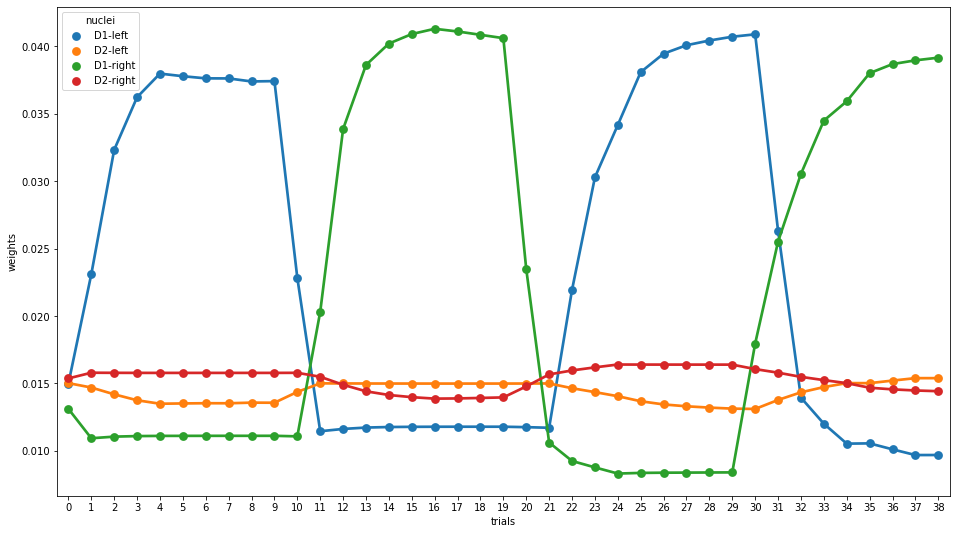

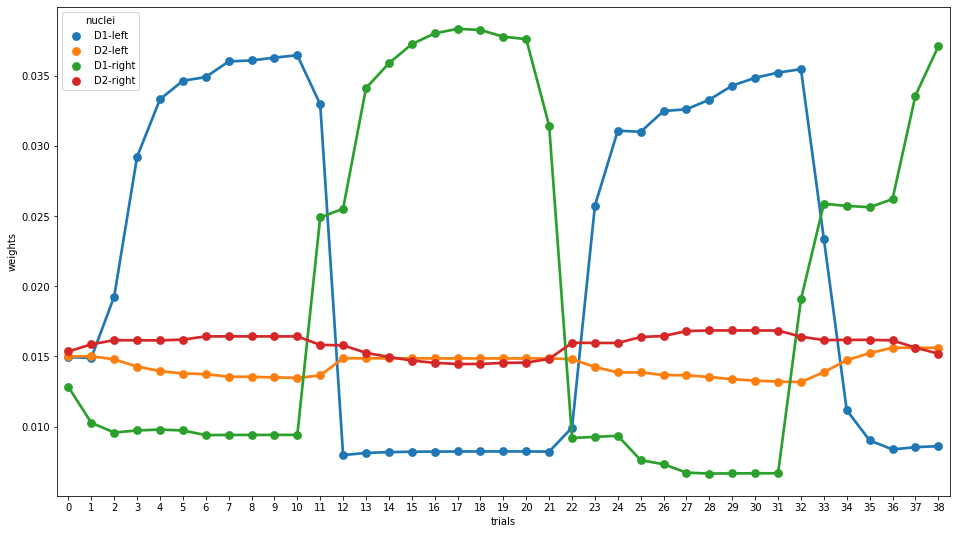

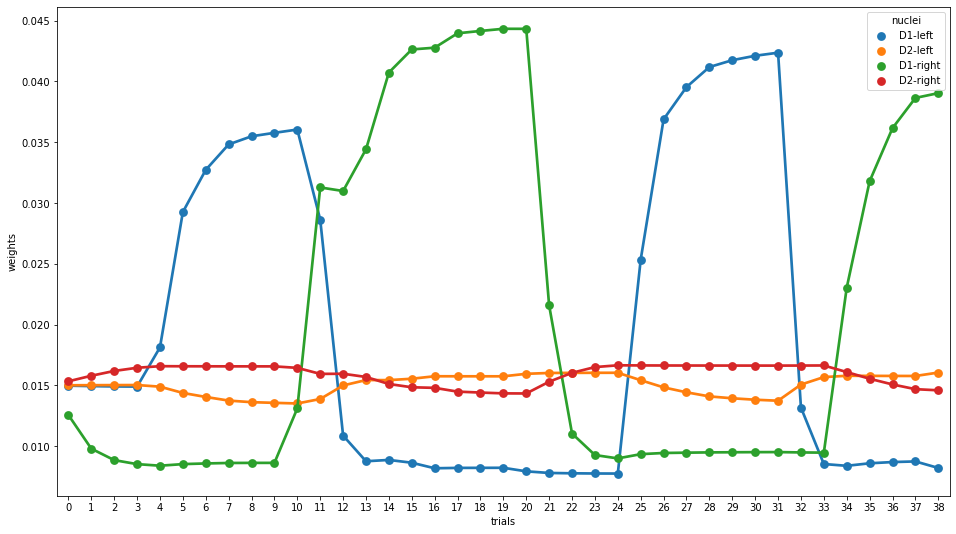

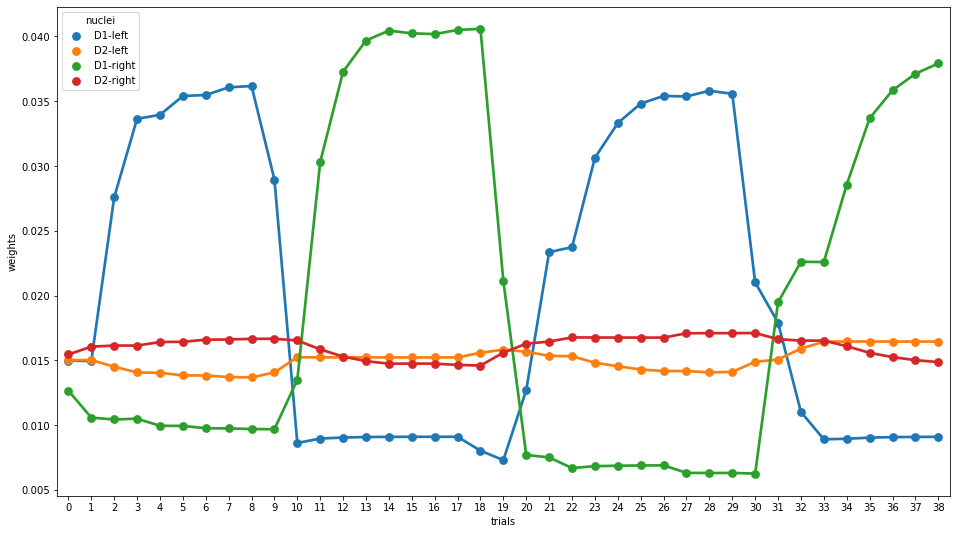

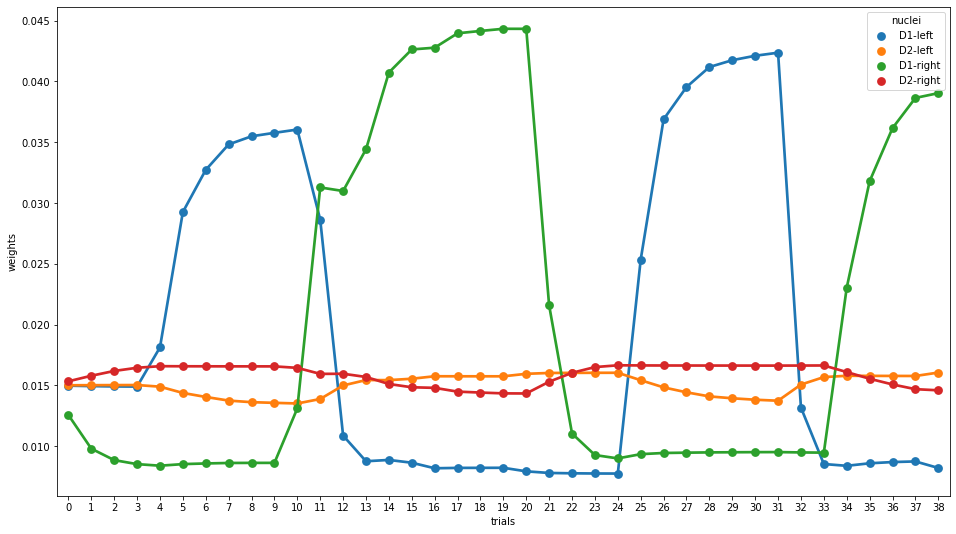

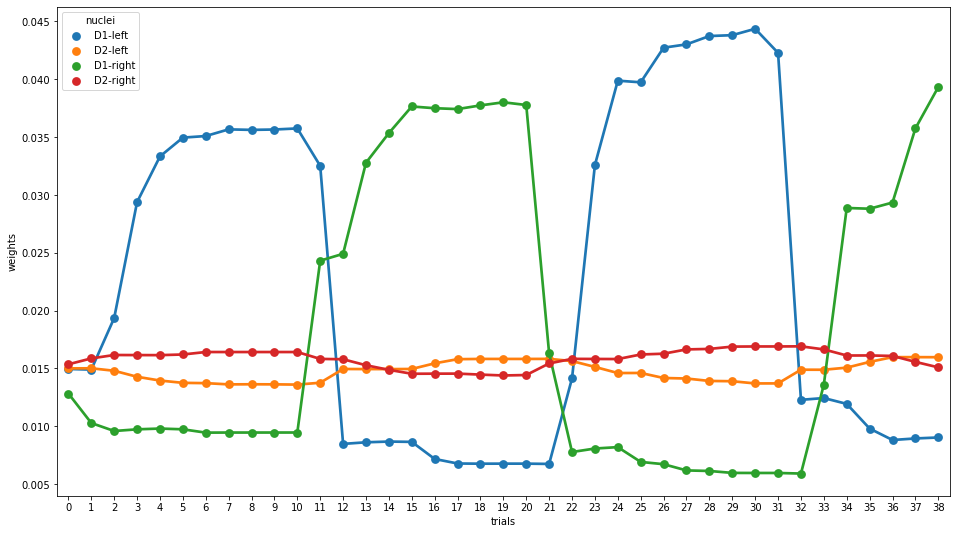

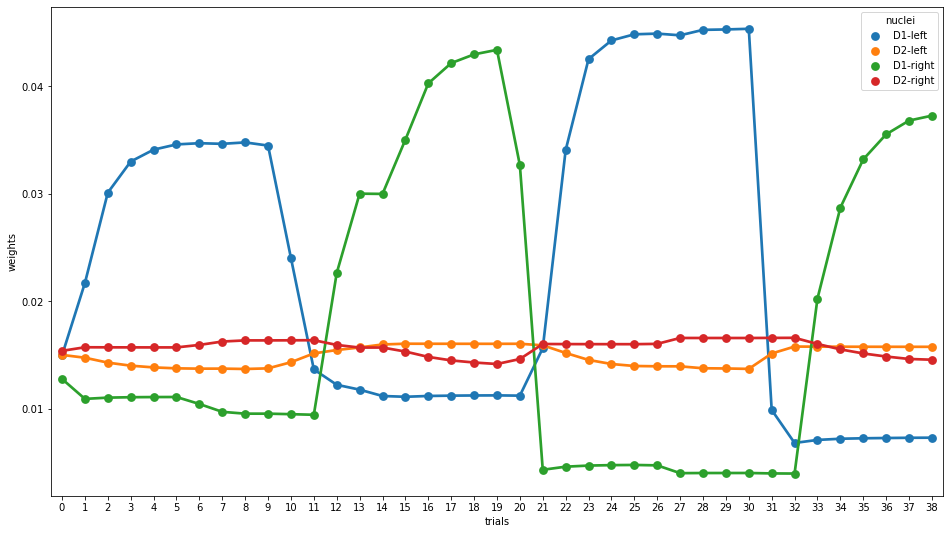

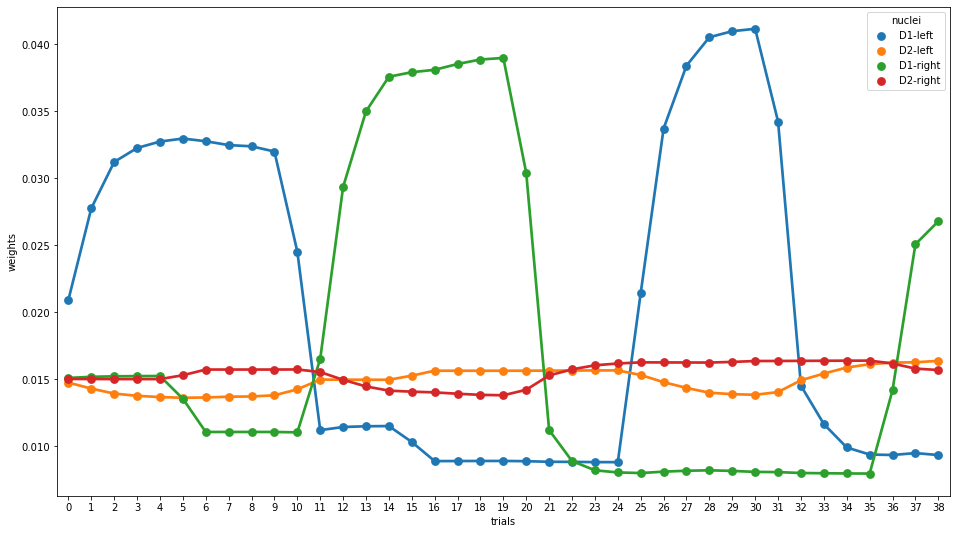

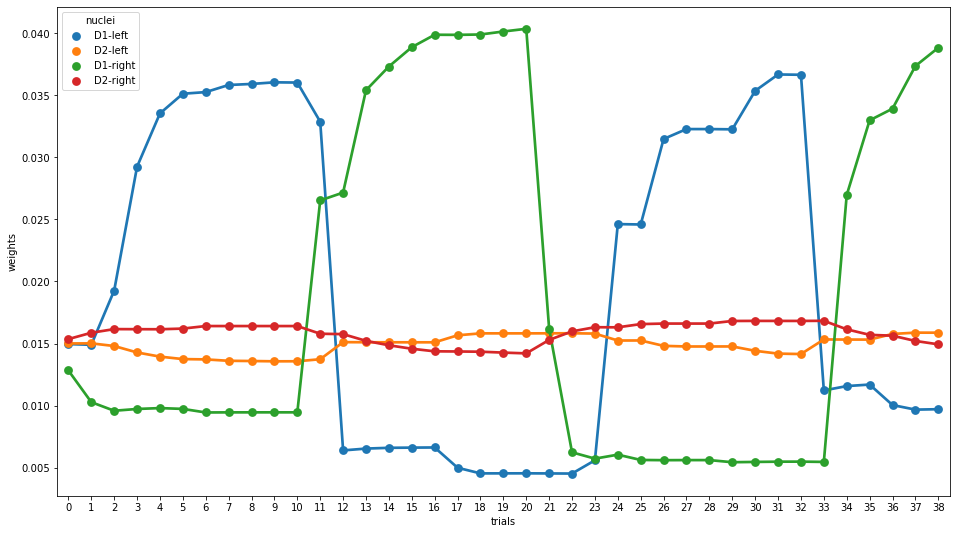

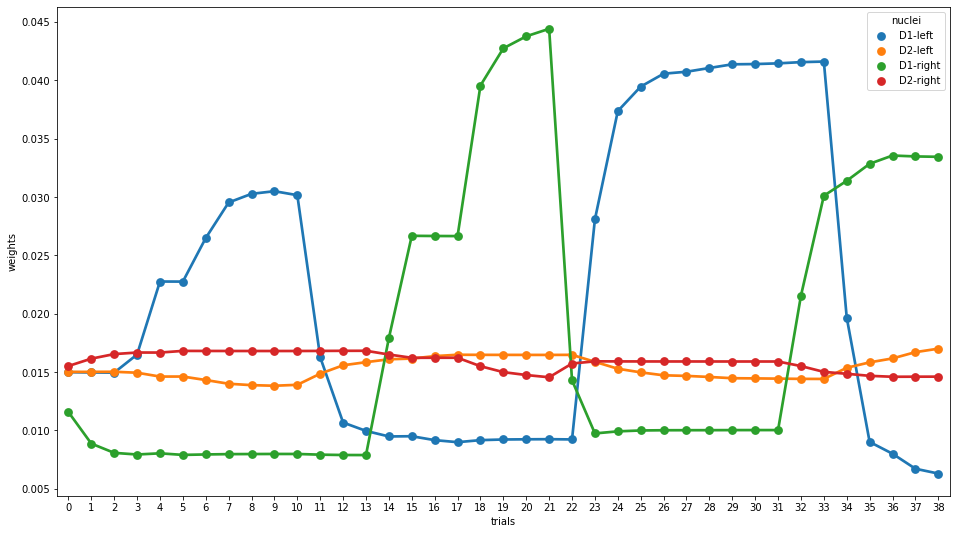

In [17]:
import seaborn as sns
for i in np.arange(len(results)):
    weights = np.array(results[i]['agent'].hist_w)
    weights[0]
    np.shape(weights)
    reshaped_wts = weights.reshape(len(weights),4)
    nuc_list = ['D1-left','D2-left','D1-right','D2-right' ]
    ind_list = [(0,0),(0,1),(1,0),(1,1)]
    weights_df = pd.DataFrame(columns=["weights","trials","nuclei"])

    for j in np.arange(4):
        temp = pd.DataFrame()
        temp["weights"] = [ np.mean(reshaped_wts[:,j][datatables[0]['stimulusstarttime'][i]:datatables[0]['stimulusstarttime'][i+1]])   for i in np.arange(len(datatables[0])-1) ]
        #temp["weights"] = [ weights[:,ind_list[j][0],ind_list[j][1],:,:][datatables[0]['stimulusstarttime'][i]:datatables[0]['stimulusstarttime'][i+1]])   for i in np.arange(len(datatables[0])-1) ]
        temp["trials"] = np.arange(0,len(datatables[0])-1)
        temp["nuclei"] = nuc_list[j]
        weights_df = weights_df.append(temp)
    
    weights_df.to_csv(data_dir+"Weights_"+str(seed)+".csv")
    fig,ax = plt.subplots(1,1,figsize=(16,9))
    sns.pointplot(x="trials",y="weights",hue="nuclei",data=weights_df,ax=ax)
    fig.savefig(figure_dir+"Weights_"+str(seed)+"_"+str(i)+".png")    

In [18]:
#import seaborn as sns


In [19]:
#weights_all = np.array(results[0]['agent'].hist_w_all)
#shape_all = np.shape(weights_all)
#print(shape_all)
#weights_all_reshaped = weights_all.reshape(shape_all[0],4,shape_all[3]*shape_all[4])
#np.shape(weights_all_reshaped)


In [20]:
results[0]['actionchannels']

action
0   left
1  right

In [21]:
results[0]['popdata']

name  action     N     C    Taum RestPot ResetPot Threshold RestPot_ca  \
0     GPi`   left`   75`  0.5`     20`    -70`     -55`      -50`       -85`   
1     GPi`  right`   75`  0.5`     20`    -70`     -55`      -50`       -85`   
2    STNE`   left`  750`  0.5`     20`    -70`     -55`      -50`       -85`   
3    STNE`  right`  750`  0.5`     20`    -70`     -55`      -50`       -85`   
4    GPeP`   left`  750`  0.5`     20`    -70`     -55`      -50`       -85`   
5    GPeP`  right`  750`  0.5`     20`    -70`     -55`      -50`       -85`   
6   D1STR`   left`   75`  0.5`     20`    -70`     -55`      -50`       -85`   
7   D1STR`  right`   75`  0.5`     20`    -70`     -55`      -50`       -85`   
8   D2STR`   left`   75`  0.5`     20`    -70`     -55`      -50`       -85`   
9   D2STR`  right`   75`  0.5`     20`    -70`     -55`      -50`       -85`   
10    LIP`   left`  204`  0.5`     20`    -70`     -55`      -50`       -85`   
11    LIP`  right`  204`  0.5`     20`    -70`     -55`      -50`       -85`   
12     Th`   left`   75`  0.5`  27.78`    -70`     -55`      -50`       -85`   
13     Th`  right`   75`  0.5`  27.78`    -70`     -55`      -50`       -85`   
14    FSI`    nan`   75`  0.2`     10`    -70`     -55`      -50`       -85`   
15   LIPI`    nan`  186`  0.2`     10`    -70`     -55`      -50`       -85`   

   Alpha_ca  ... dpmn_APOST dpmn_XPRE dpmn_XPOST dpmn_type dpmn_alphaw  \
0      0.5`  ...       nan`      nan`       nan`      nan`        nan`   
1      0.5`  ...       nan`      nan`       nan`      nan`        nan`   
2      0.5`  ...       nan`      nan`       nan`      nan`        nan`   
3      0.5`  ...       nan`      nan`       nan`      nan`        nan`   
4      0.5`  ...       nan`      nan`       nan`      nan`        nan`   
5      0.5`  ...       nan`      nan`       nan`      nan`        nan`   
6      0.5`  ...       0.0`      0.0`       0.0`        1`       39.5`   
7      0.5`  ...       0.0`      0.0`       0.0`        1`       39.5`   
8      0.5`  ...       0.0`      0.0`       0.0`        2`      -38.2`   
9      0.5`  ...       0.0`      0.0`       0.0`        2`      -38.2`   
10     0.5`  ...       nan`      nan`       nan`      nan`        nan`   
11     0.5`  ...       nan`      nan`       nan`      nan`        nan`   
12     0.5`  ...       nan`      nan`       nan`      nan`        nan`   
13     0.5`  ...       nan`      nan`       nan`      nan`        nan`   
14     0.5`  ...       nan`      nan`       nan`      nan`        nan`   
15     0.5`  ...       nan`      nan`       nan`      nan`        nan`   

   dpmn_wmax dpmn_a  dpmn_b dpmn_c column  
0       nan`   nan`    nan`   nan`      0  
1       nan`   nan`    nan`   nan`      1  
2       nan`   nan`    nan`   nan`      2  
3       nan`   nan`    nan`   nan`      3  
4       nan`   nan`    nan`   nan`      4  
5       nan`   nan`    nan`   nan`      5  
6     0.055`   1.0`    0.1`  0.05`      6  
7     0.055`   1.0`    0.1`  0.05`      7  
8     0.035`   0.5`  0.005`  0.05`      8  
9     0.035`   0.5`  0.005`  0.05`      9  
10      nan`   nan`    nan`   nan`     10  
11      nan`   nan`    nan`   nan`     11  
12      nan`   nan`    nan`   nan`     12  
13      nan`   nan`    nan`   nan`     13  
14      nan`   nan`    nan`   nan`     14  
15      nan`   nan`    nan`   nan`     15  

[16 rows x 66 columns]

In [22]:
results[0]['opt_channels_df']

left  right  trial_num
0   True   True          0
1   True   True          1
2   True   True          2
3   True   True          3
4   True   True          4
5   True   True          5
6   True   True          6
7   True   True          7
8   True   True          8
9   True   True          9
10  True   True         10
11  True   True         11
12  True   True         12
13  True   True         13
14  True   True         14
15  True   True         15
16  True   True         16
17  True   True         17
18  True   True         18
19  True   True         19
20  True   True         20
21  True   True         21
22  True   True         22
23  True   True         23
24  True   True         24
25  True   True         25
26  True   True         26
27  True   True         27
28  True   True         28
29  True   True         29
30  True   True         30
31  True   True         31
32  True   True         32
33  True   True         33
34  True   True         34
35  True   True         35
36  True   True         36
37  True   True         37
38  True   True         38
39  True   True         39

In [23]:
import importlib
importlib.reload(plt_help)

<module 'plotting_helper_functions' from '/home/bahuguna/Work/CBGT_CMU/cbgt2_plasticity/plotting_helper_functions.py'>

In [24]:
firing_rates, reward_q_df, performance, rt_dist, total_performance = plt_help.extract_relevant_frames(results,seed)

In [25]:
total_performance

%_correct_actions     seed n_trials  volatility  conflict  \
0               77.5  8325804      NaN        10.0       1.0   
0               72.5  8325804      NaN        10.0       1.0   
0               60.0  8325804      NaN        10.0       1.0   
0               67.5  8325804      NaN        10.0       1.0   
0               60.0  8325804      NaN        10.0       1.0   
0               65.0  8325804      NaN        10.0       1.0   
0               70.0  8325804      NaN        10.0       1.0   
0               67.5  8325804      NaN        10.0       1.0   
0               67.5  8325804      NaN        10.0       1.0   
0               62.5  8325804      NaN        10.0       1.0   

   volatility/num_trials  Q_val->dopamine_scale condition  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control

In [26]:
temp = firing_rates[0].groupby("variable").max()

ind = np.where(temp["nuclei"].str.contains("STR"))[0]
temp1 = temp.iloc[ind][["nuclei","firing_rate","channel"]]
temp1["nuclei_channel"] = temp1["nuclei"]+"_"+temp1["channel"]
max_firing_rates = temp1[["nuclei_channel","firing_rate"]]
max_firing_rates = max_firing_rates.reset_index()
max_firing_rates = max_firing_rates.drop(columns='variable')
# max_firing_rates = max_firing_rates.T
# max_firing_rates.columns=max_firing_rates.iloc[0]
# max_firing_rates = max_firing_rates.drop_duplicates()
print(max_firing_rates)
max_firing_rates['d1_dpmn_wmax'] = results[0]['d1']['dpmn_wmax'].values[0]
max_firing_rates['d2_dpmn_wmax'] = results[0]['d2']['dpmn_wmax'].values[0]
max_firing_rates['d1_dpmn_alphaw'] = results[0]['d1']['dpmn_alphaw'].values[0]
max_firing_rates['d2_dpmn_alphaw'] = results[0]['d2']['dpmn_alphaw'].values[0]
max_firing_rates['dpmn_CPP_scale'] = results[0]['Q_support_params']['dpmn_CPP_scale'].values[0]
max_firing_rates['q_alpha'] = results[0]['Q_support_params']['q_alpha'].values[0]
max_firing_rates['performance'] = total_performance["%_correct_actions"].values[0]
max_firing_rates['conflict'] = total_performance['conflict'].values[0]
max_firing_rates['seed'] = seed
print(max_firing_rates)

max_firing_rates.to_csv(data_dir+"max_firing_rates_"+str(seed)+".csv")

  nuclei_channel  firing_rate
0     D1STR_left    24.666667
1    D1STR_right    24.222222
2     D2STR_left    21.555556
3    D2STR_right    21.333333
  nuclei_channel  firing_rate  d1_dpmn_wmax  d2_dpmn_wmax  d1_dpmn_alphaw  \
0     D1STR_left    24.666667         0.055         0.035            39.5   
1    D1STR_right    24.222222         0.055         0.035            39.5   
2     D2STR_left    21.555556         0.055         0.035            39.5   
3    D2STR_right    21.333333         0.055         0.035            39.5   

   d2_dpmn_alphaw  dpmn_CPP_scale  q_alpha  performance  conflict     seed  
0           -38.2              85      0.6         77.5       1.0  8325804  
1           -38.2              85      0.6         77.5       1.0  8325804  
2           -38.2              85      0.6         77.5       1.0  8325804  
3           -38.2              85      0.6         77.5       1.0  8325804  


In [27]:
kern = np.arange(0,10)/10.
weights = np.array(results[0]['agent'].hist_w)
pop_list_names = ["D1-left","D1-right","D2-left","D2-right" ]

DA_p = pd.DataFrame.from_records(results[0]['agent'].hist_DAp,columns=pop_list_names)
DA_p["Time"] = np.arange(0,len(DA_p))
DA_p_melt = DA_p.melt("Time")
DA_p_melt = DA_p_melt.rename(columns={'value':'DA_p'})

Apre = pd.DataFrame.from_records(results[0]['agent'].hist_Apre,columns=nuc_list)
Apre["Time"] = np.arange(0,len(Apre))
Apre_melt = Apre.melt("Time")
Apre_melt = Apre_melt.rename(columns={'value':'Apre'})
Apre_melt["Apre"] = np.convolve(Apre_melt["Apre"],kern,mode='same')

Apost = pd.DataFrame.from_records(results[0]['agent'].hist_Apost,columns=nuc_list)
Apost["Time"] = np.arange(0,len(Apost))
Apost_melt = Apost.melt("Time")
Apost_melt = Apost_melt.rename(columns={'value':'Apost'})
Apost_melt["Apost"] = np.convolve(Apost_melt["Apost"],kern,mode='same')

dp_E = pd.DataFrame.from_records(results[0]['agent'].hist_E,columns=pop_list_names)
dp_E["Time"] = np.arange(0,len(dp_E))
dp_E_melt = dp_E.melt("Time")
dp_E_melt = dp_E_melt.rename(columns={'value':'Eligibility'})
#dp_E_melt["Eligibility"] = np.convolve(dp_E_melt["Eligibility"],kern,mode='same')

Wts = pd.DataFrame.from_records(np.array(results[0]['agent'].hist_w).reshape(len(weights),4),columns=nuc_list)
Wts["Time"] = np.arange(0,len(Wts))
Wts_melt = Wts.melt("Time")
Wts_melt = Wts_melt.rename(columns={'value':'Weights'})

# Xpre = pd.DataFrame.from_records(results[0]['agent'].hist_Xpre,columns=nuc_list)
# Xpre["Time"] = np.arange(0,len(Xpre))
# Xpre_melt = Xpre.melt("Time")
# Xpre_melt = Xpre_melt.rename(columns={'value':'Xpre'})
# Xpre_melt["Xpre"] = np.convolve(Xpre_melt["Xpre"],kern,mode='same')

# Xpost = pd.DataFrame.from_records(results[0]['agent'].hist_Xpost,columns=nuc_list)
# Xpost["Time"] = np.arange(0,len(Xpost))
# Xpost_melt = Xpost.melt("Time")
# Xpost_melt = Xpost_melt.rename(columns={'value':'Xpost'})
# Xpost_melt["Xpost"] = np.convolve(Xpost_melt["Xpost"],kern,mode='same')


# Apre_Xpost = Apre_melt.copy()
# Apre_Xpost["Apre"] = Apre_melt.Apre * Xpost_melt.Xpost
# Apre_Xpost = Apre_Xpost.rename(columns={'Apre':"Apre*Xpost"})
# Apre_Xpost["Apre*Xpost"] = np.convolve(Apre_Xpost["Apre*Xpost"],kern,mode='same')

# Apost_Xpre = Apost_melt.copy()
# Apost_Xpre["Apost"] = Apost_melt.Apost * Xpre_melt.Xpre
# Apost_Xpre = Apost_Xpre.rename(columns={'Apost':"Apost*Xpre"})
# Apost_Xpre["Apost*Xpre"] = np.convolve(Apost_Xpre["Apost*Xpre"],kern,mode='same')


ValueError: v cannot be empty

In [ ]:


# fig,ax = plt.subplots(9,1,figsize=(24,24))

# sns.lineplot(x="Time",y="DA_p",hue ="variable" ,ax=ax[0],data=DA_p_melt)
# sns.lineplot(x="Time",y="Apre",hue="variable",ax=ax[1],data=Apre_melt)
# sns.lineplot(x="Time",y="Apost",hue="variable",ax=ax[2],data=Apost_melt)
# sns.lineplot(x="Time",y="Xpre",hue="variable",ax=ax[3],data=Xpre_melt)
# sns.lineplot(x="Time",y="Xpost",hue="variable",ax=ax[4],data=Xpost_melt)
# sns.lineplot(x="Time",y="Apre*Xpost",hue="variable",ax=ax[5],data=Apre_Xpost)
# sns.lineplot(x="Time",y="Apost*Xpre",hue="variable",ax=ax[6],data=Apost_Xpre)
# sns.lineplot(x="Time",y="Eligibility",hue="variable",ax=ax[7],data=dp_E_melt)
# sns.lineplot(x="Time",y="Weights",hue="variable",ax=ax[8],data=Wts_melt)


# # sns.pointplot(x="Trials",y="value",hue="variable" ,data=reward_q_df[0].loc[reward_q_df[0]["data_type"]=="reward_df"],ax=ax[5],hue_order=["left","right"])
# # ax[5].set_ylabel("Reward_df")
# # sns.pointplot(x="Trials",y="value",hue="variable" ,data=reward_q_df[0].loc[reward_q_df[0]["data_type"]=="chosen action"],ax=ax[6],hue_order=["left","right"])
# # ax[6].set_ylabel("Chosen_action")
# # sns.pointplot(x="Trials",y="value",hue="variable" ,data=reward_q_df[0].loc[reward_q_df[0]["data_type"]=="Q_df"],ax=ax[7],hue_order=["left","right"])
# # ax[7].set_ylabel("Q value")
# fig.subplots_adjust(bottom=0.06,left=0.06,top=0.95,right=0.97)
# # #plt.xlim(400,800)
# plt.savefig(figure_dir+"STDP_"+str(seed)+".png")
# plt.show()

In [28]:
plt_help.pool_data()


['3925141', '2834299', '4214927', '3843835', '2937428', '6897539', '2915187', '9475558', '7474536', '9242571', '7930449', '3856738', '9732825', '1324094', '6953254', '8325804', '9909590', '9404740', '3254218', '1299915', '2807188', '7769958', '4486526']
    Unnamed: 0  %_rewarded_actions  %_action actions  block       seed  \
0            0           90.000000      25.0    left   left  3925141_0   
1            1            0.000000       2.5    none   left  3925141_0   
2            2           40.000000      25.0   right   left  3925141_0   
3            3           20.000000      12.5    left  right  3925141_0   
4            4           78.571429      35.0   right  right  3925141_0   
..         ...                 ...       ...     ...    ...        ...   
37           3          100.000000      30.0   right  right  4486526_8   
38           0          100.000000      37.5    left   left  4486526_9   
39           1            0.000000      15.0   right   left  4486526_9   
40    

In [29]:
#import pickle
#pickle.dump(reward_q_df,open(data_dir+str(seed)+"/reward_b_cpp.pickle","wb"))

In [30]:
#reward_df = pickle.load(open(data_dir+str(seed)+"/reward_b_cpp.pickle","rb"))
#len(reward_df)


In [31]:
reward_q_df[0]

level_0  index  Trials variable     value data_type       seed  n_trials  \
0          0     41       0     left  0.500000      Q_df  8325804_0      40.0   
1          1     42       1     left  0.500000      Q_df  8325804_0      40.0   
2          2     43       2     left  0.802401      Q_df  8325804_0      40.0   
3          3     44       3     left  0.926833      Q_df  8325804_0      40.0   
4          4     45       4     left  0.984178      Q_df  8325804_0      40.0   
..       ...    ...     ...      ...       ...       ...        ...       ...   
237       35     35      35    right  1.000000     block  8325804_0      40.0   
238       36     36      36    right  1.000000     block  8325804_0      40.0   
239       37     37      37    right  1.000000     block  8325804_0      40.0   
240       38     38      38    right  1.000000     block  8325804_0      40.0   
241       39     39      39     left  0.000000     block  8325804_0      40.0   

     volatility  volatility/num_trials  conflict condition  
0          10.0                   25.0       1.0   Control  
1          10.0                   25.0       1.0   Control  
2          10.0                   25.0       1.0   Control  
3          10.0                   25.0       1.0   Control  
4          10.0                   25.0       1.0   Control  
..          ...                    ...       ...       ...  
237        10.0                   25.0       1.0   Control  
238        10.0                   25.0       1.0   Control  
239        10.0                   25.0       1.0   Control  
240        10.0                   25.0       1.0   Control  
241        10.0                   25.0       1.0   Control  

[242 rows x 12 columns]

In [32]:
total_performance

%_correct_actions     seed n_trials  volatility  conflict  \
0               77.5  8325804      NaN        10.0       1.0   
0               72.5  8325804      NaN        10.0       1.0   
0               60.0  8325804      NaN        10.0       1.0   
0               67.5  8325804      NaN        10.0       1.0   
0               60.0  8325804      NaN        10.0       1.0   
0               65.0  8325804      NaN        10.0       1.0   
0               70.0  8325804      NaN        10.0       1.0   
0               67.5  8325804      NaN        10.0       1.0   
0               67.5  8325804      NaN        10.0       1.0   
0               62.5  8325804      NaN        10.0       1.0   

   volatility/num_trials  Q_val->dopamine_scale condition  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control

In [33]:
results[0]['block']

array(['left', 'left', 'left', 'left', 'left', 'left', 'left', 'left',
       'left', 'left', 'right', 'right', 'right', 'right', 'right',
       'right', 'right', 'right', 'right', 'right', 'left', 'left',
       'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left',
       'right', 'right', 'right', 'right', 'right', 'right', 'right',
       'right', 'right', 'left'], dtype='<U5')

In [34]:
results[0]['popfreqs']

GPi_left  GPi_right  STNE_left  STNE_right  GPeP_left  GPeP_right  \
0      72.444444  69.333333  24.644444   24.333333  62.244444   63.866667   
1      72.222222  70.222222  24.533333   24.600000  62.444444   63.711111   
2      72.666667  70.222222  24.555556   24.577778  62.244444   64.155556   
3      72.000000  67.777778  24.711111   24.422222  62.577778   64.244444   
4      72.666667  68.666667  24.711111   24.644444  62.711111   64.377778   
...          ...        ...        ...         ...        ...         ...   
43713  66.222222  72.444444  24.422222   24.977778  63.244444   60.866667   
43714  66.000000  73.111111  24.244444   24.933333  62.844444   60.844444   
43715  66.222222  72.444444  24.155556   24.955556  62.311111   61.022222   
43716  67.111111  71.777778  24.577778   25.066667  61.666667   61.822222   
43717  67.555556  71.333333  24.600000   24.955556  61.600000   62.222222   

       D1STR_left  D1STR_right  D2STR_left  D2STR_right   Cx_left  Cx_right  \
0        1.555556     2.444444    2.222222     1.777778  0.000000  0.000000   
1        1.777778     2.666667    2.000000     1.777778  0.000000  0.000000   
2        1.777778     2.666667    2.000000     1.555556  0.000000  0.000000   
3        1.777778     2.444444    2.000000     1.555556  0.000000  0.000000   
4        1.777778     2.444444    2.000000     1.333333  0.000000  0.000000   
...           ...          ...         ...          ...       ...       ...   
43713    3.111111     1.777778    2.666667     2.888889  0.653595  0.816993   
43714    3.333333     1.777778    3.111111     2.888889  0.653595  0.816993   
43715    3.333333     1.777778    3.111111     2.666667  0.653595  0.816993   
43716    3.333333     1.777778    3.111111     2.666667  0.653595  0.816993   
43717    3.333333     1.777778    3.111111     2.666667  0.653595  0.816993   

        Th_left  Th_right  FSI_common  CxI_common  Time (ms)  
0      5.111111  7.777778    8.444444    0.985663          0  
1      4.888889  7.777778    8.444444    0.896057          1  
2      5.111111  7.777778    8.444444    0.896057          2  
3      5.555556  7.777778    8.222222    0.896057          3  
4      5.333333  8.000000    8.000000    0.896057          4  
...         ...       ...         ...         ...        ...  
43713  8.444444  7.777778    8.666667    1.254480      43713  
43714  8.444444  7.555556    8.666667    1.344086      43714  
43715  8.444444  7.555556    8.666667    1.344086      43715  
43716  8.222222  7.555556    8.666667    1.344086      43716  
43717  8.000000  7.555556    8.444444    1.344086      43717  

[43718 rows x 17 columns]

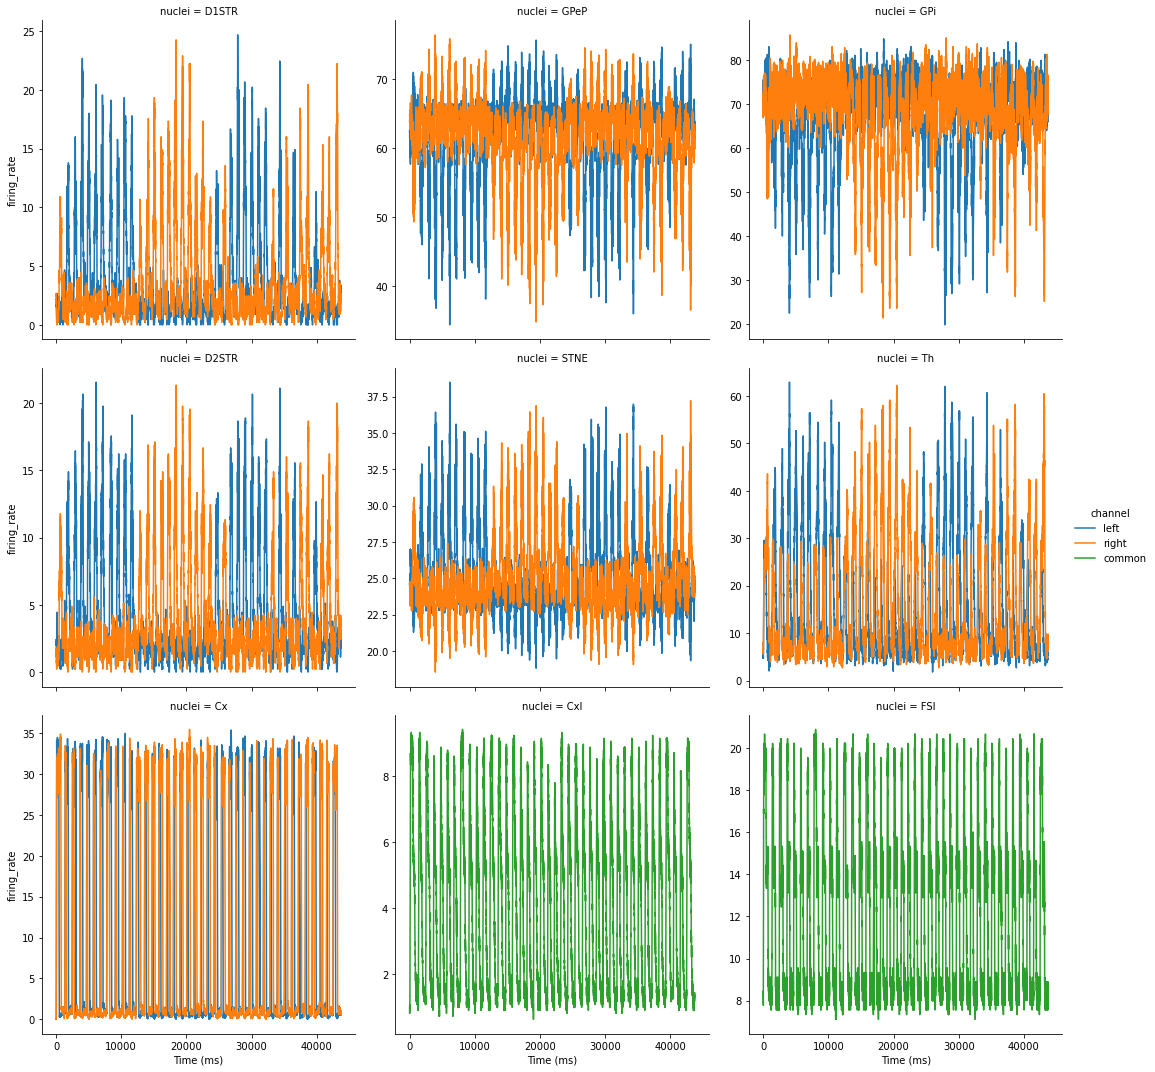

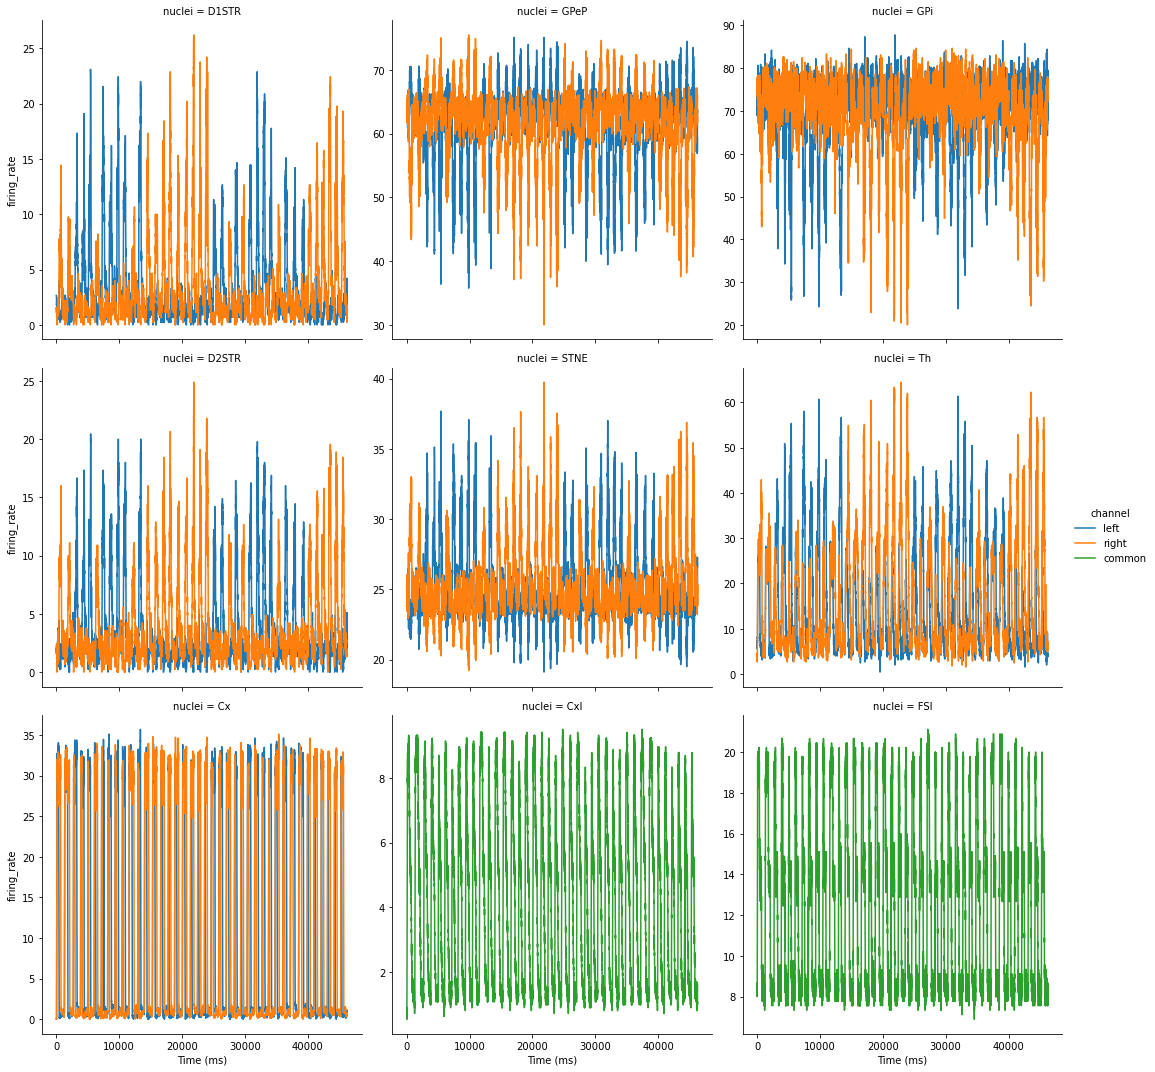

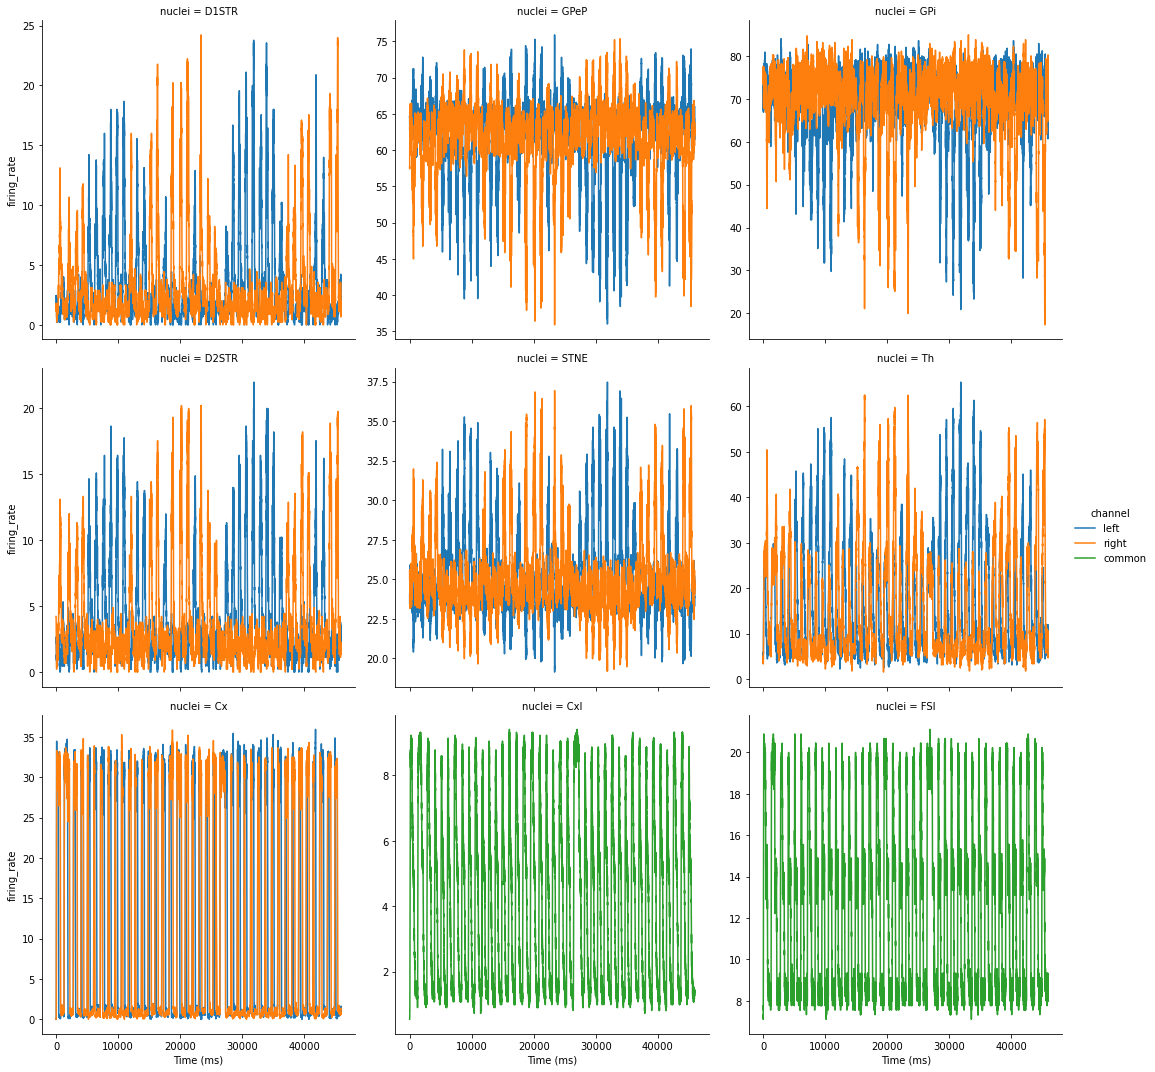

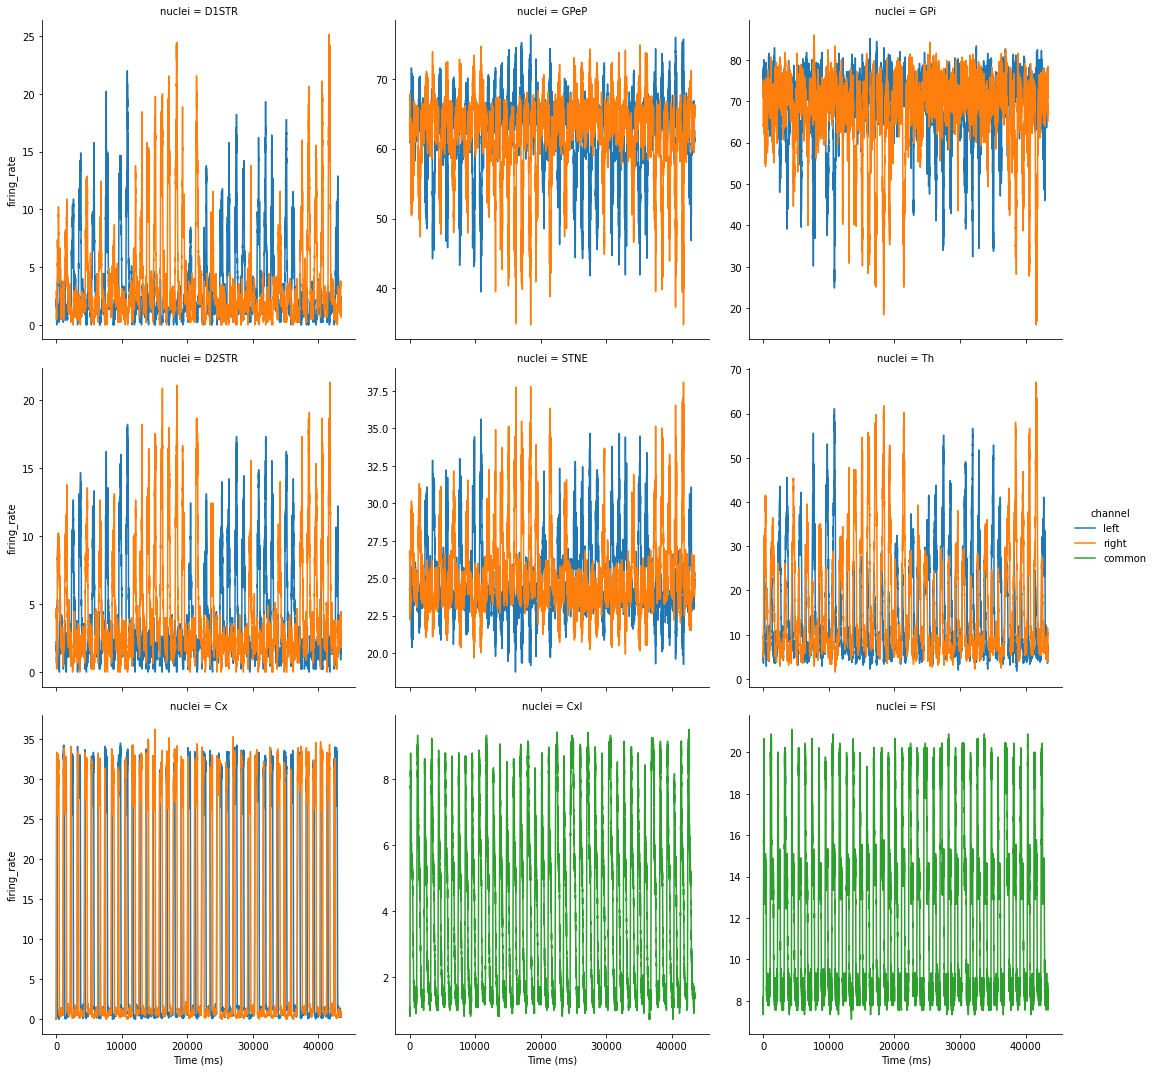

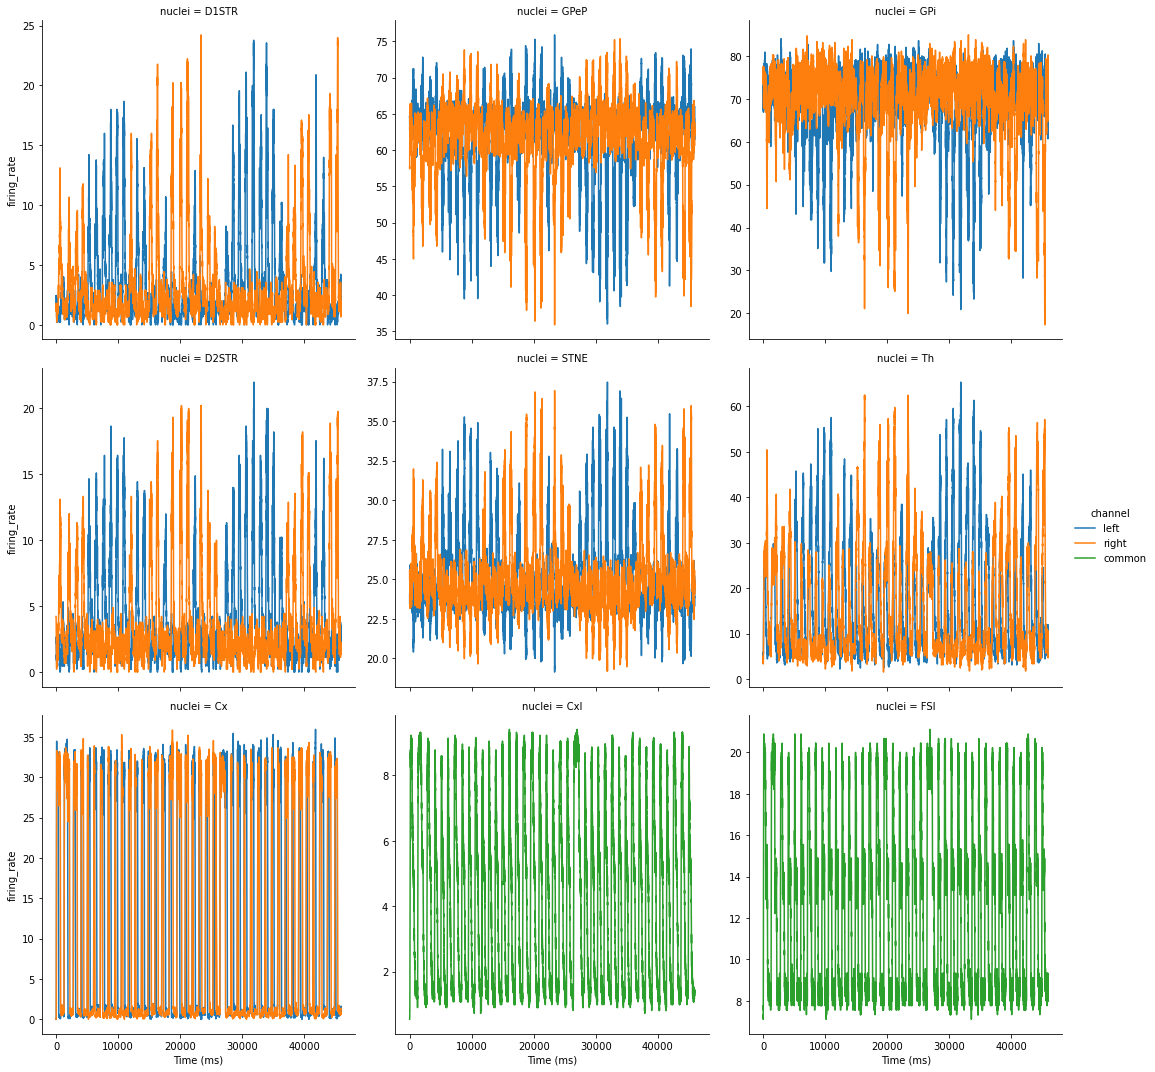

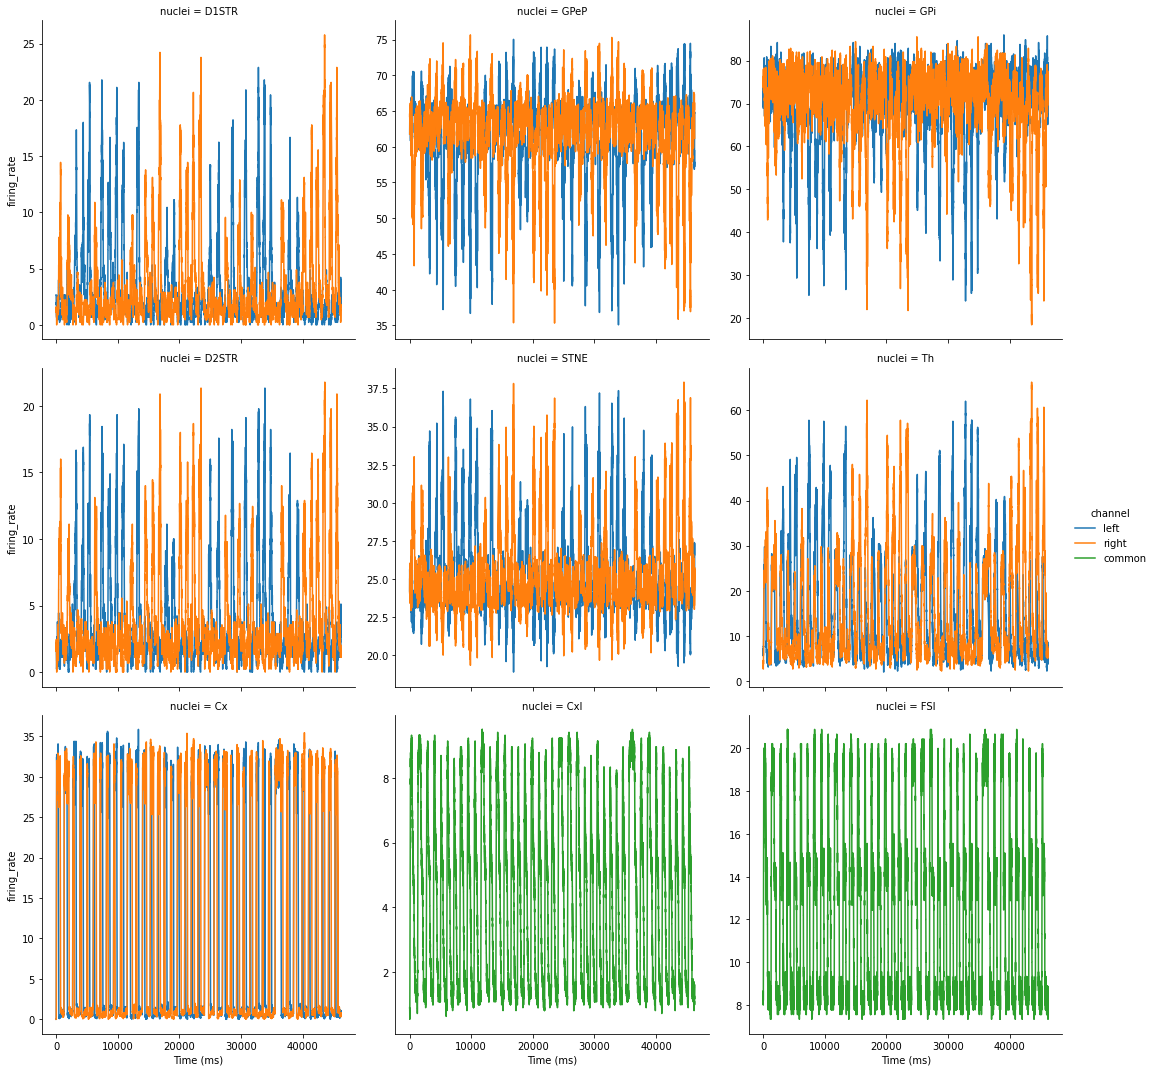

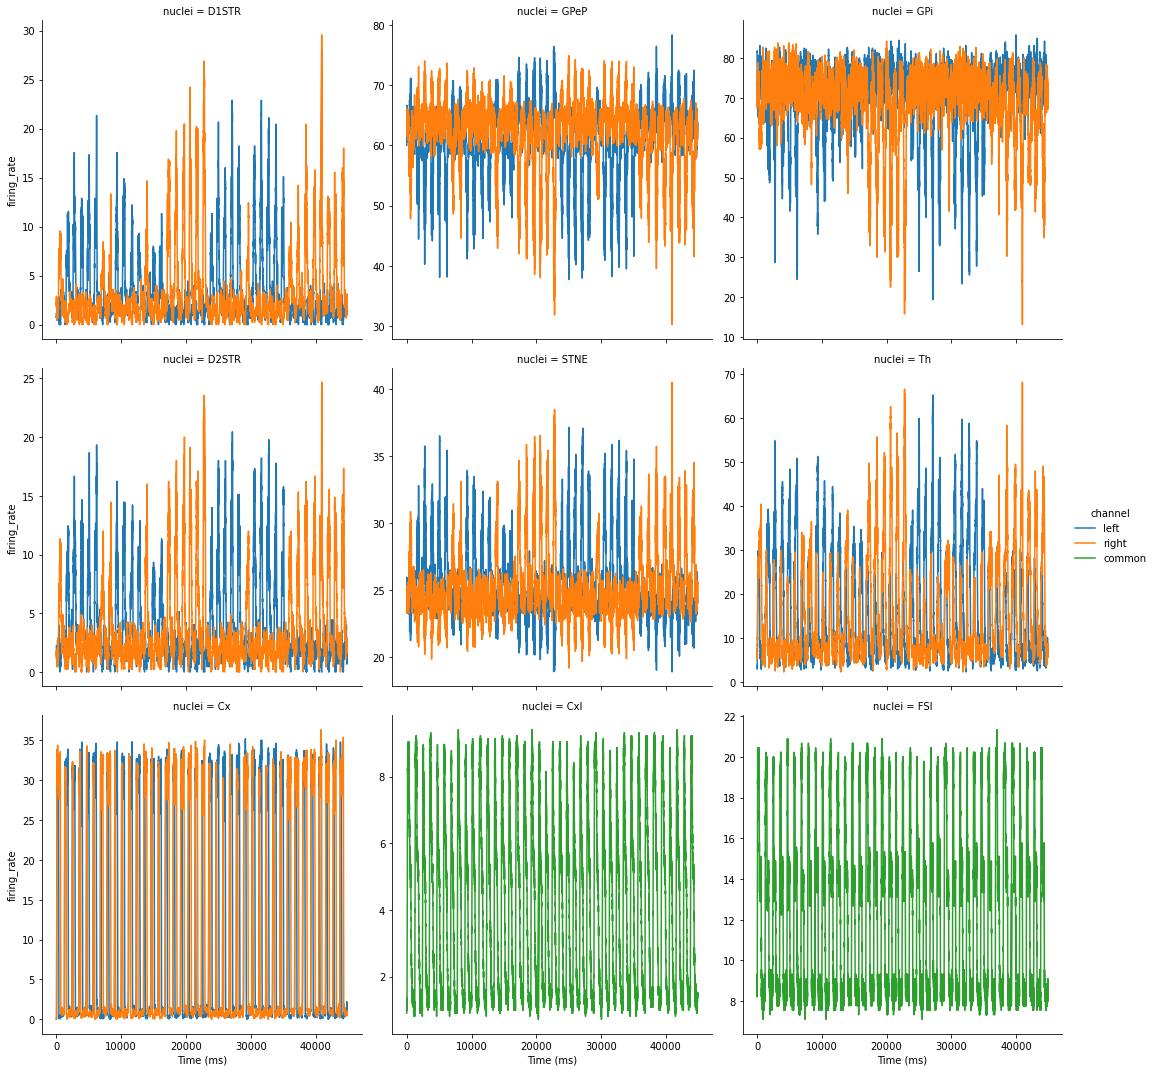

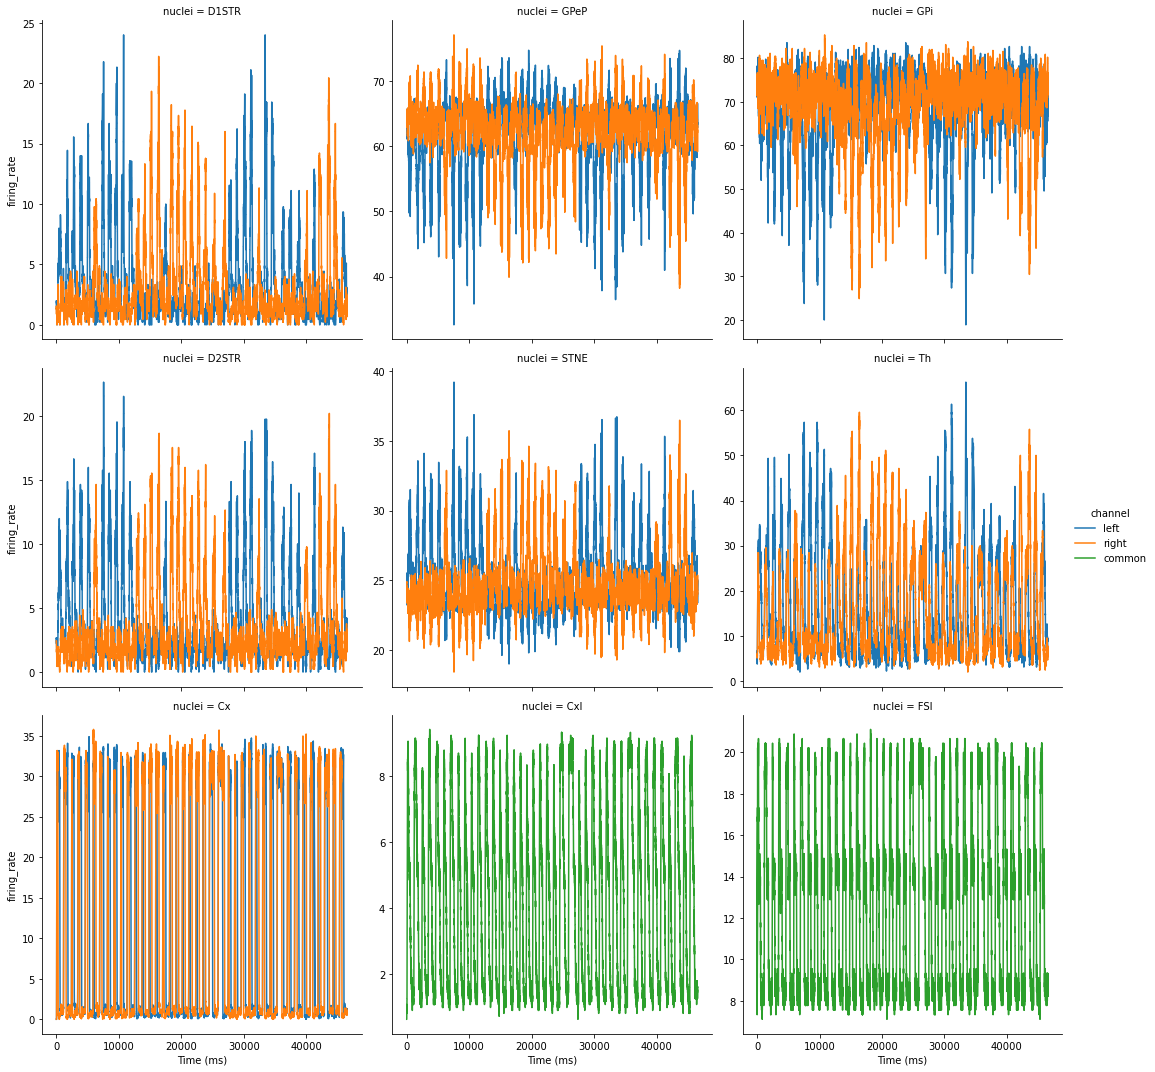

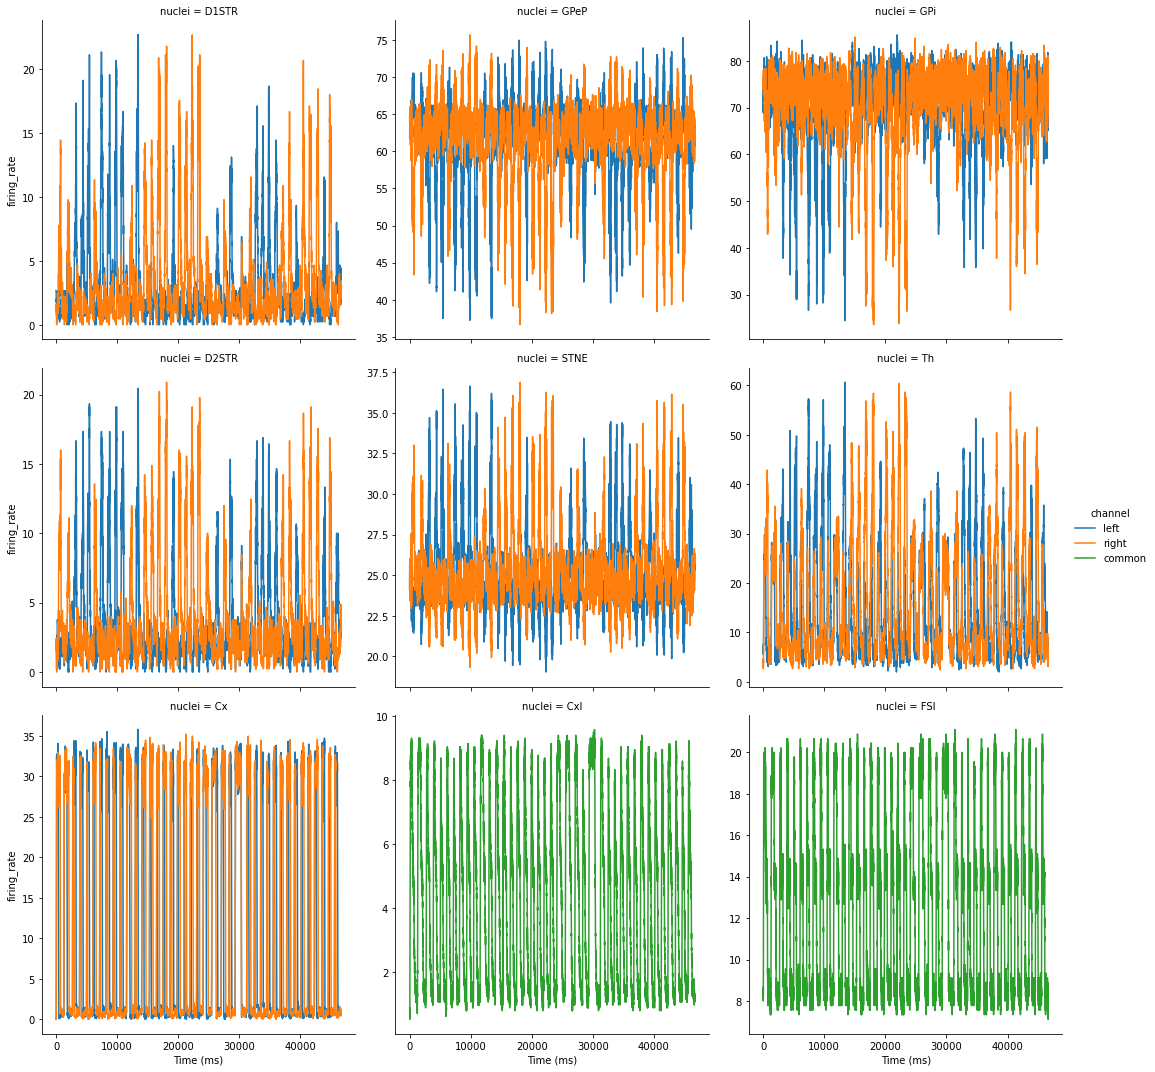

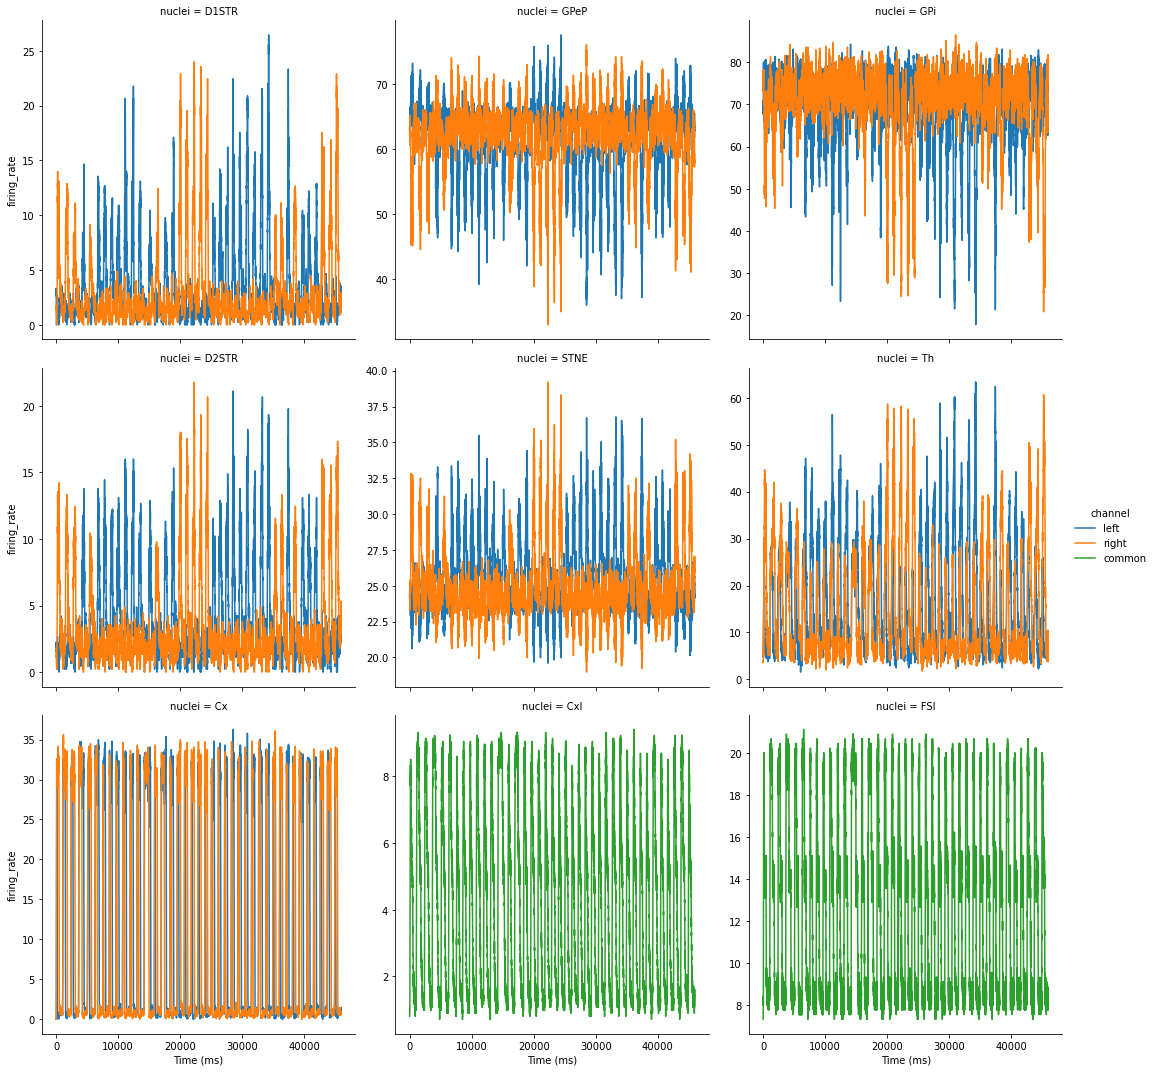

In [35]:
# You can smoothen the FR by sending smooth=True, default: smooth=False
#plt_func.plot_fr(results[0],smooth=True)
plt_func.plot_fr(firing_rates,seed)


In [36]:
# LLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRRRRRRRLLLLLLLLLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRR

# LLLRLLLRLLLRRLLLLLRRRRRRLLRRRRLLRRRLRRRRLLLLLRLLRLLLLLRLLLLRLLLLLRRRRRRRRRRRRRRRRR

# LLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRRRRRRRLLLLLLLLLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRR

In [37]:
reward_q_df[0]

level_0  index  Trials variable     value data_type       seed  n_trials  \
0          0     41       0     left  0.500000      Q_df  8325804_0      40.0   
1          1     42       1     left  0.500000      Q_df  8325804_0      40.0   
2          2     43       2     left  0.802401      Q_df  8325804_0      40.0   
3          3     44       3     left  0.926833      Q_df  8325804_0      40.0   
4          4     45       4     left  0.984178      Q_df  8325804_0      40.0   
..       ...    ...     ...      ...       ...       ...        ...       ...   
237       35     35      35    right  1.000000     block  8325804_0      40.0   
238       36     36      36    right  1.000000     block  8325804_0      40.0   
239       37     37      37    right  1.000000     block  8325804_0      40.0   
240       38     38      38    right  1.000000     block  8325804_0      40.0   
241       39     39      39     left  0.000000     block  8325804_0      40.0   

     volatility  volatility/num_trials  conflict condition  
0          10.0                   25.0       1.0   Control  
1          10.0                   25.0       1.0   Control  
2          10.0                   25.0       1.0   Control  
3          10.0                   25.0       1.0   Control  
4          10.0                   25.0       1.0   Control  
..          ...                    ...       ...       ...  
237        10.0                   25.0       1.0   Control  
238        10.0                   25.0       1.0   Control  
239        10.0                   25.0       1.0   Control  
240        10.0                   25.0       1.0   Control  
241        10.0                   25.0       1.0   Control  

[242 rows x 12 columns]

In [38]:
import importlib

importlib.reload(plt_func)

<module 'plotting_functions' from '/home/bahuguna/Work/CBGT_CMU/cbgt2_plasticity/plotting_functions.py'>

{'left': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'right': (1.0, 0.4980392156862745, 0.054901960784313725)}
{'left': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'right': (1.0, 0.4980392156862745, 0.054901960784313725)}
{'left': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'right': (1.0, 0.4980392156862745, 0.054901960784313725)}
{'left': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'right': (1.0, 0.4980392156862745, 0.054901960784313725)}
{'left': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'right': (1.0, 0.4980392156862745, 0.054901960784313725)}
{'left': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'right': (1.0, 0.4980392156862745, 0.054901960784313725)}
{'left': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'right': (1.0, 0.4980392156862745, 0.054901960784313725)}
{'left': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'right': (1.0, 0.4

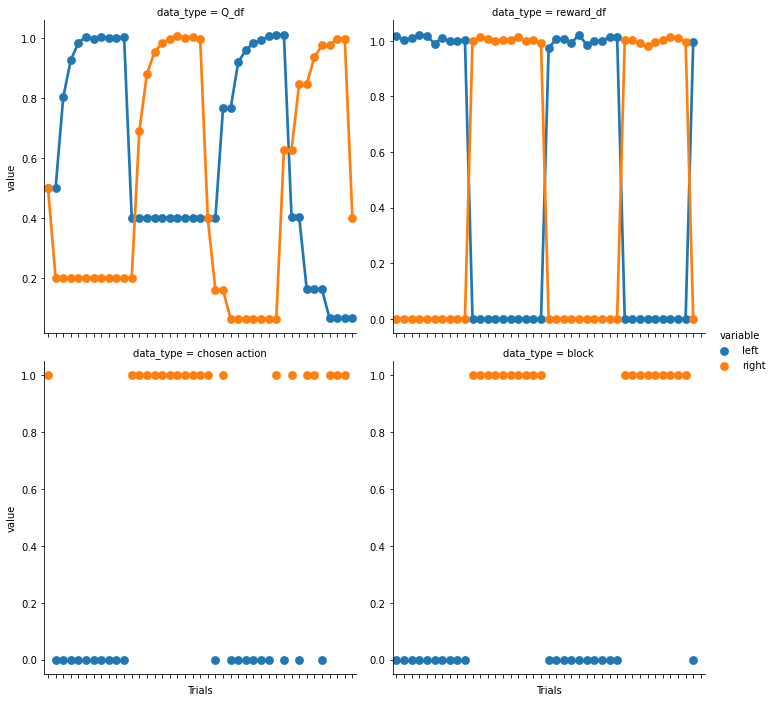

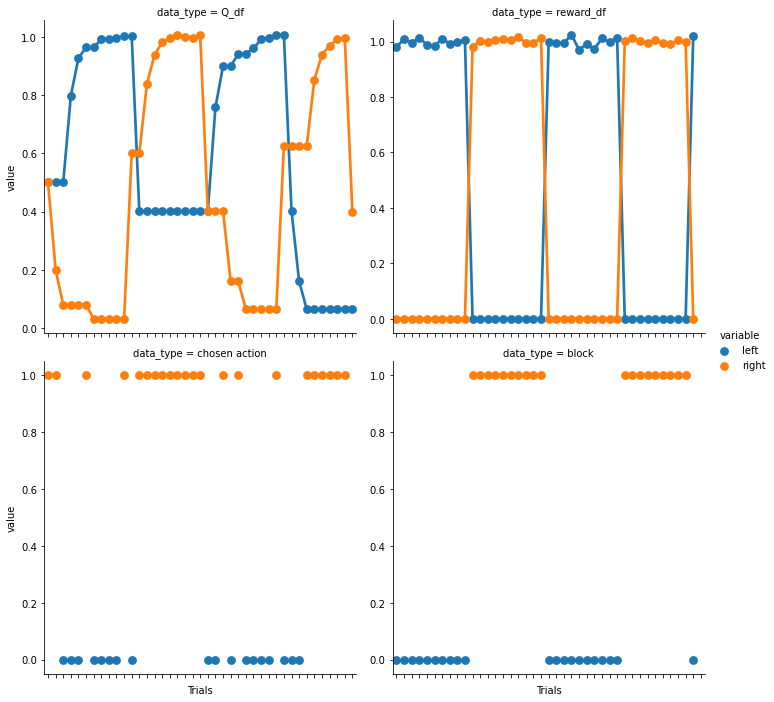

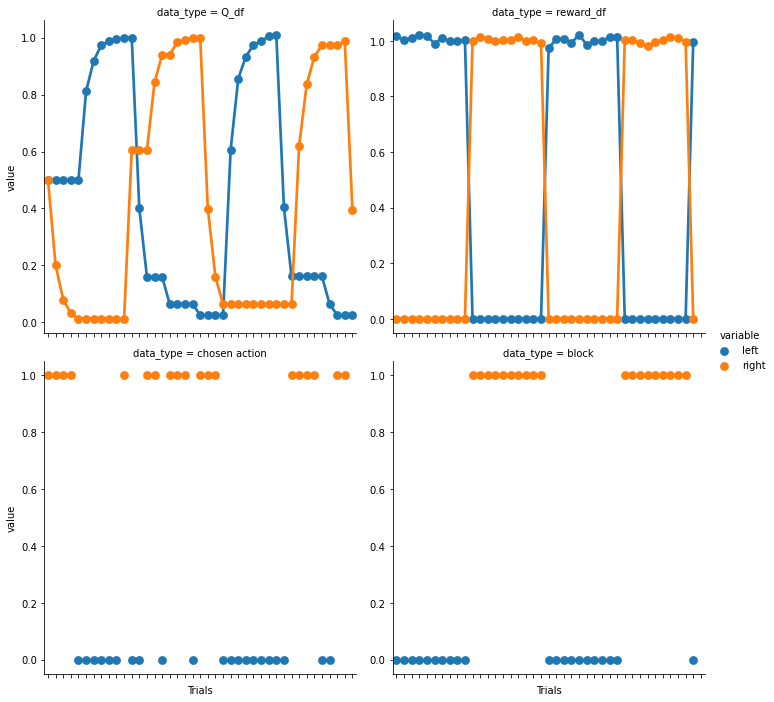

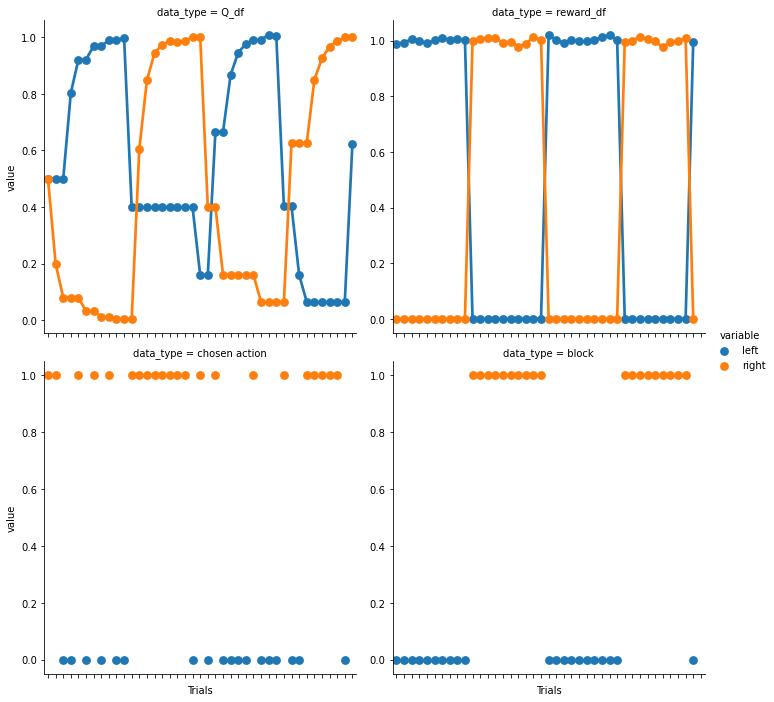

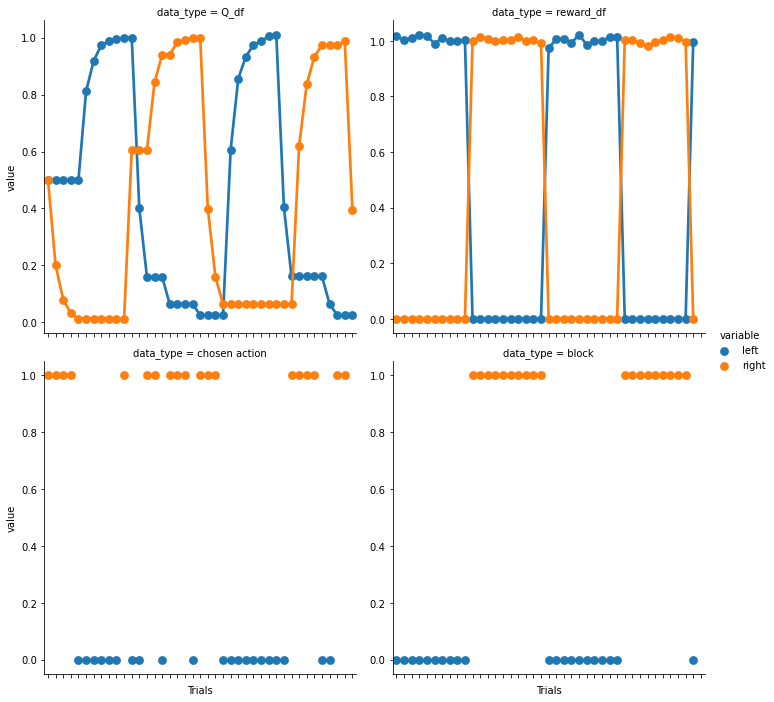

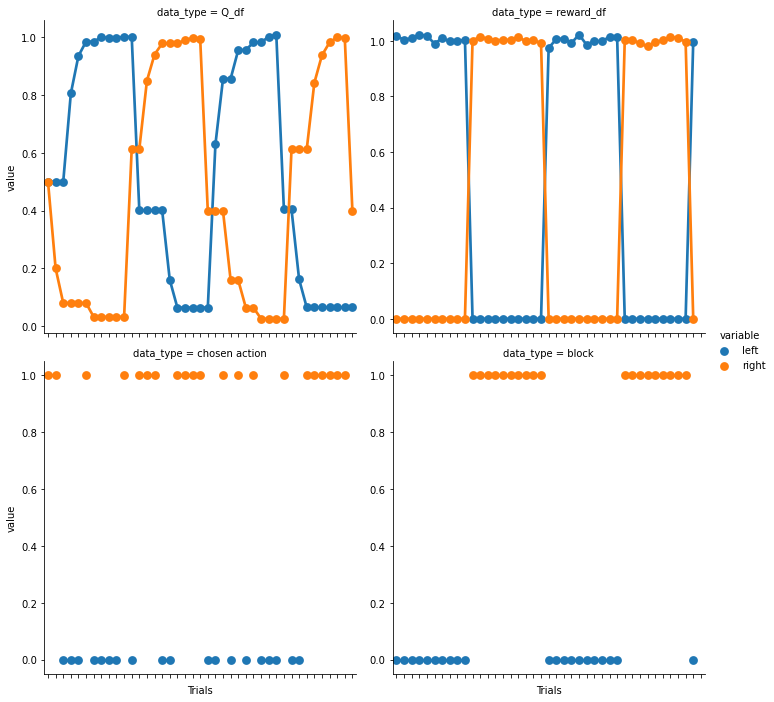

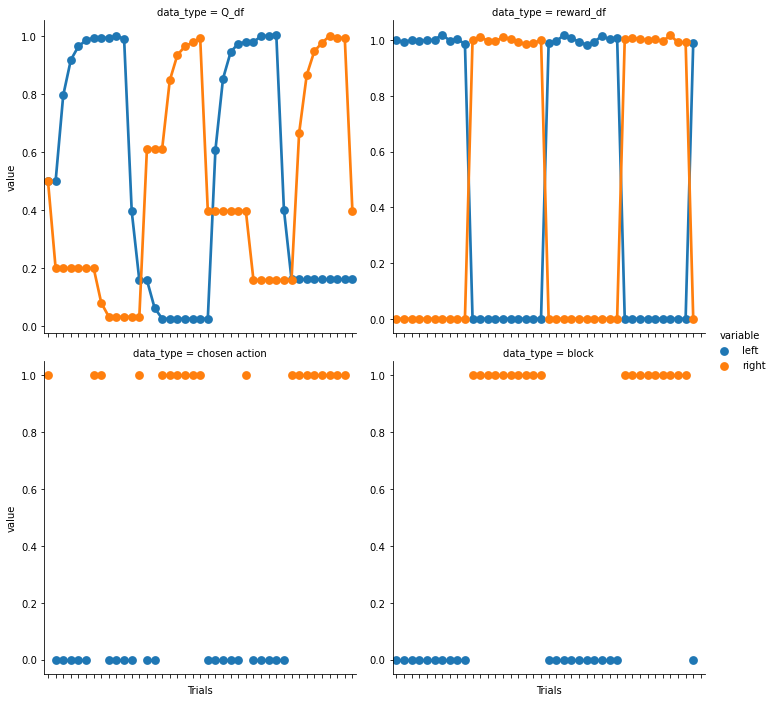

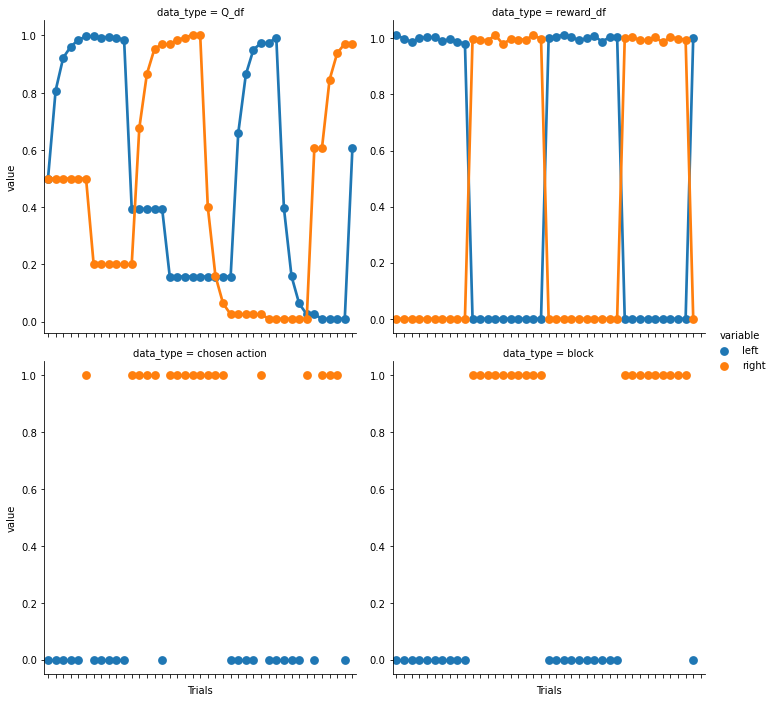

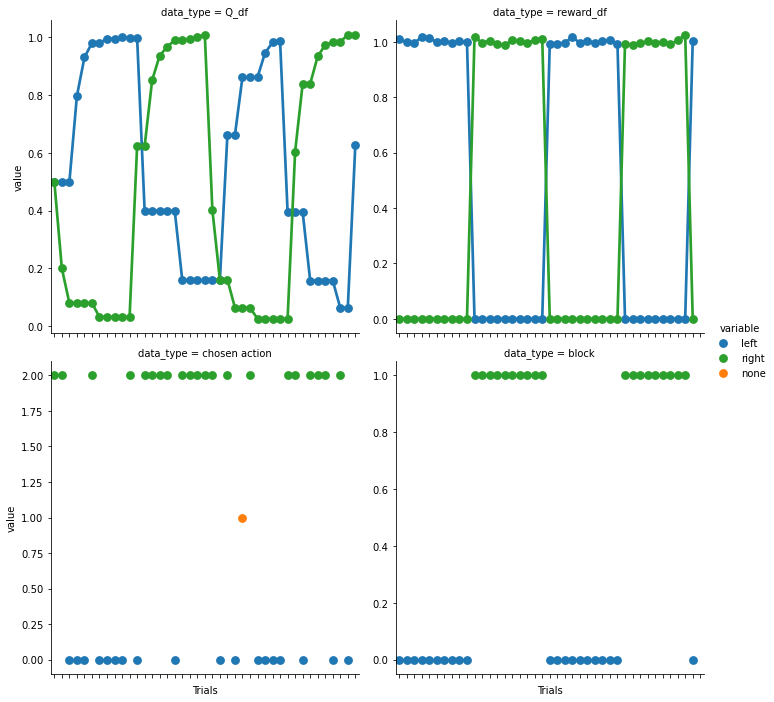

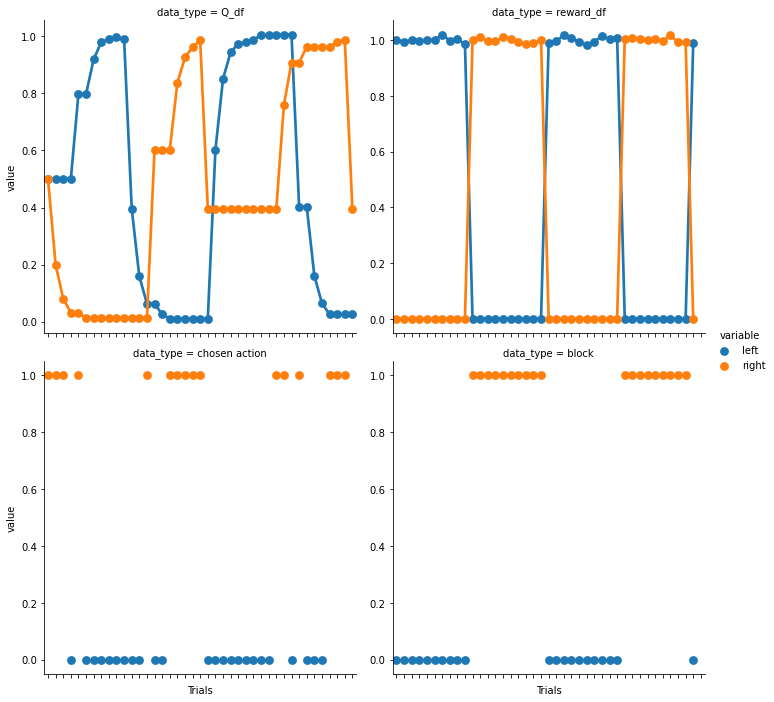

In [39]:
plt_func.plot_reward_Q_df(reward_q_df)

In [40]:
savedresults = cbgt.loadResults(data_dir+'network_data_'+str(seed))
savedresults[0]['Q_support_params']

bayes_unif_min  bayes_unif_max  bayes_H  bayes_sF  q_alpha  dpmn_CPP_scale  \
0             0.0             2.0     0.05      1.25      0.6              85   

   reward_value chosen_action  
0           0.0         right

In [41]:
datatables = cbgt.collateVariable(results,'datatables')

In [42]:
datatables[0]

decision stimulusstarttime decisiontime decisionduration  \
0     right                 0          421              421   
1      left              1323         1546              223   
2      left              2448         2719              271   
3      left              3621         3741              120   
4      left              4643         4779              136   
5      left              5681         5819              138   
6      left              6721         6837              116   
7      left              7739         8155              416   
8      left              9057         9249              192   
9      left             10151        10304              153   
10     left             11206        11376              170   
11    right             12278        12628              350   
12    right             13530        13789              259   
13    right             14691        14827              136   
14    right             15729        16018              289   
15    right             16920        17063              143   
16    right             17965        18074              109   
17    right             18976        19118              142   
18    right             20020        20228              208   
19    right             21130        21247              117   
20    right             22149        22239               90   
21    right             23141        23316              175   
22     left             24218        24408              190   
23    right             25310        25564              254   
24     left             26466        26621              155   
25     left             27523        27677              154   
26     left             28579        28698              119   
27     left             29600        29795              195   
28     left             30697        30867              170   
29     left             31769        31902              133   
30    right             32804        32990              186   
31     left             33892        34101              209   
32    right             35003        35171              168   
33     left             36073        36229              156   
34    right             37131        37293              162   
35    right             38195        38353              158   
36     left             39255        39531              276   
37    right             40433        40552              119   
38    right             41454        41553               99   
39    right             42455        42815              360   

   decisiondurationplusdelay rewardtime correctdecision  reward  
0                        722        722            left     0.0  
1                        524       1847            left     1.0  
2                        572       3020            left     1.0  
3                        421       4042            left     1.0  
4                        437       5080            left     1.0  
5                        439       6120            left     1.0  
6                        417       7138            left     1.0  
7                        717       8456            left     1.0  
8                        493       9550            left     1.0  
9                        454      10605            left     1.0  
10                       471      11677           right     0.0  
11                       651      12929           right     1.0  
12                       560      14090           right     1.0  
13                       437      15128           right     1.0  
14                       590      16319           right     1.0  
15                       444      17364           right     1.0  
16                       410      18375           right     1.0  
17                       443      19419           right     1.0  
18                       509      20529           right     1.0  
19                       418      21548           right     1.0  
20                       391     

In [43]:
total_performance

%_correct_actions     seed n_trials  volatility  conflict  \
0               77.5  8325804      NaN        10.0       1.0   
0               72.5  8325804      NaN        10.0       1.0   
0               60.0  8325804      NaN        10.0       1.0   
0               67.5  8325804      NaN        10.0       1.0   
0               60.0  8325804      NaN        10.0       1.0   
0               65.0  8325804      NaN        10.0       1.0   
0               70.0  8325804      NaN        10.0       1.0   
0               67.5  8325804      NaN        10.0       1.0   
0               67.5  8325804      NaN        10.0       1.0   
0               62.5  8325804      NaN        10.0       1.0   

   volatility/num_trials  Q_val->dopamine_scale condition  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control  
0                   25.0                     85   Control

Pooling data
['3925141', '2834299', '4214927', '3843835', '2937428', '6897539', '2915187', '9475558', '7474536', '9242571', '7930449', '3856738', '9732825', '1324094', '6953254', '8325804', '9909590', '9404740', '3254218', '1299915', '2807188', '7769958', '4486526']
    Unnamed: 0  %_rewarded_actions  %_action actions  block       seed  \
0            0           90.000000      25.0    left   left  3925141_0   
1            1            0.000000       2.5    none   left  3925141_0   
2            2           40.000000      25.0   right   left  3925141_0   
3            3           20.000000      12.5    left  right  3925141_0   
4            4           78.571429      35.0   right  right  3925141_0   
..         ...                 ...       ...     ...    ...        ...   
37           3          100.000000      30.0   right  right  4486526_8   
38           0          100.000000      37.5    left   left  4486526_9   
39           1            0.000000      15.0   right   left  448652

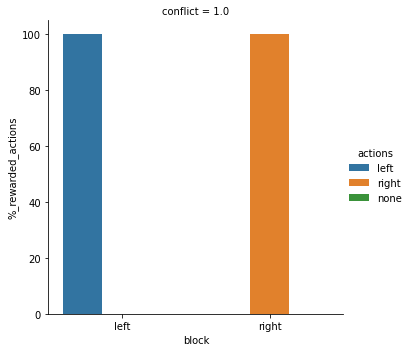

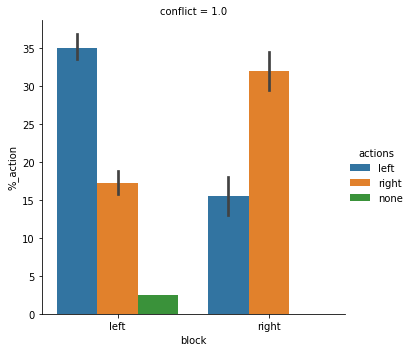

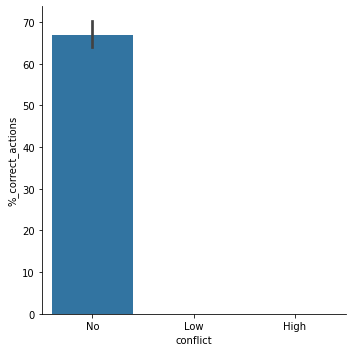

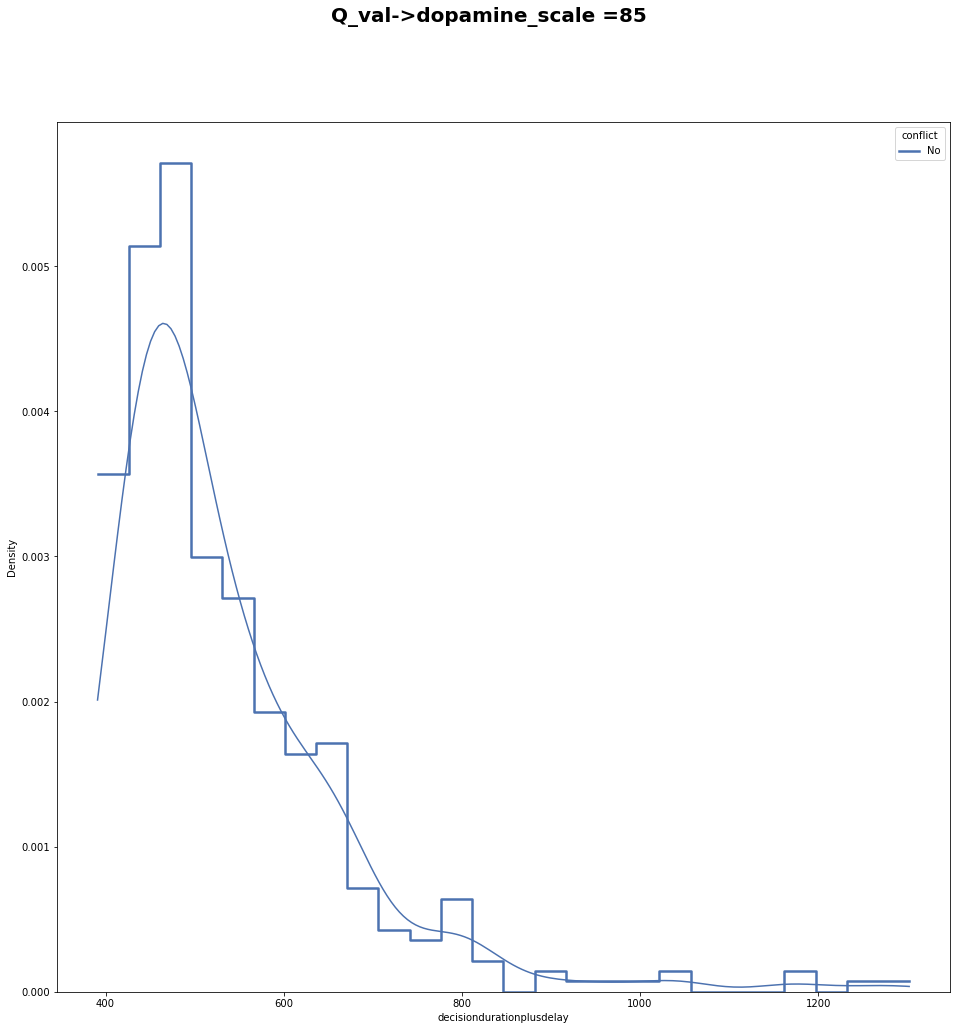

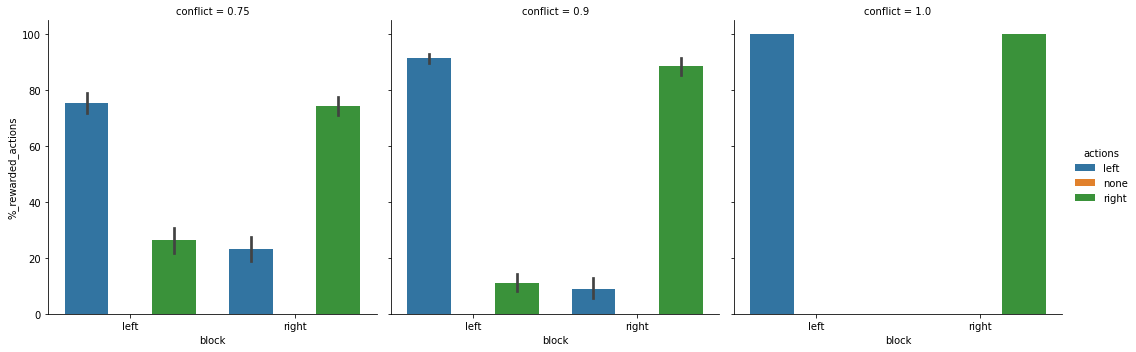

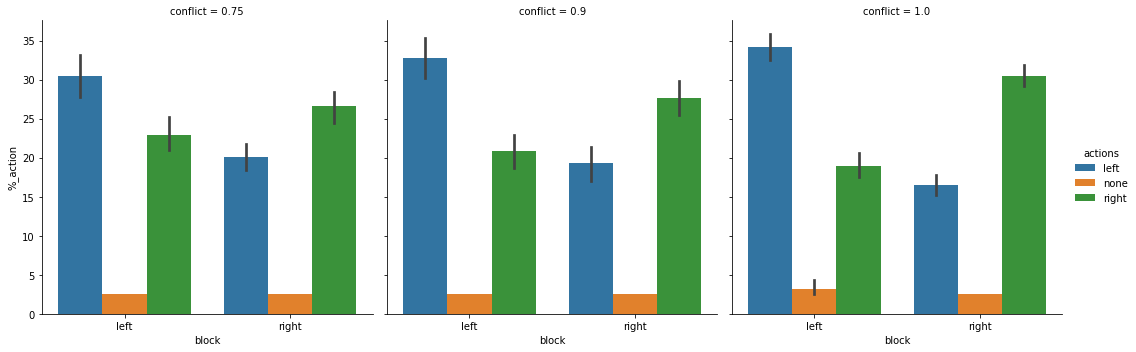

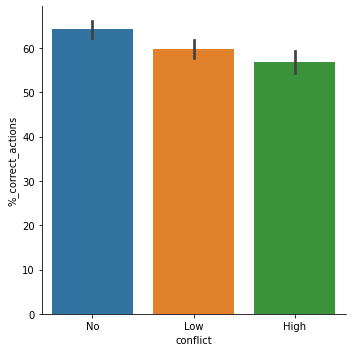

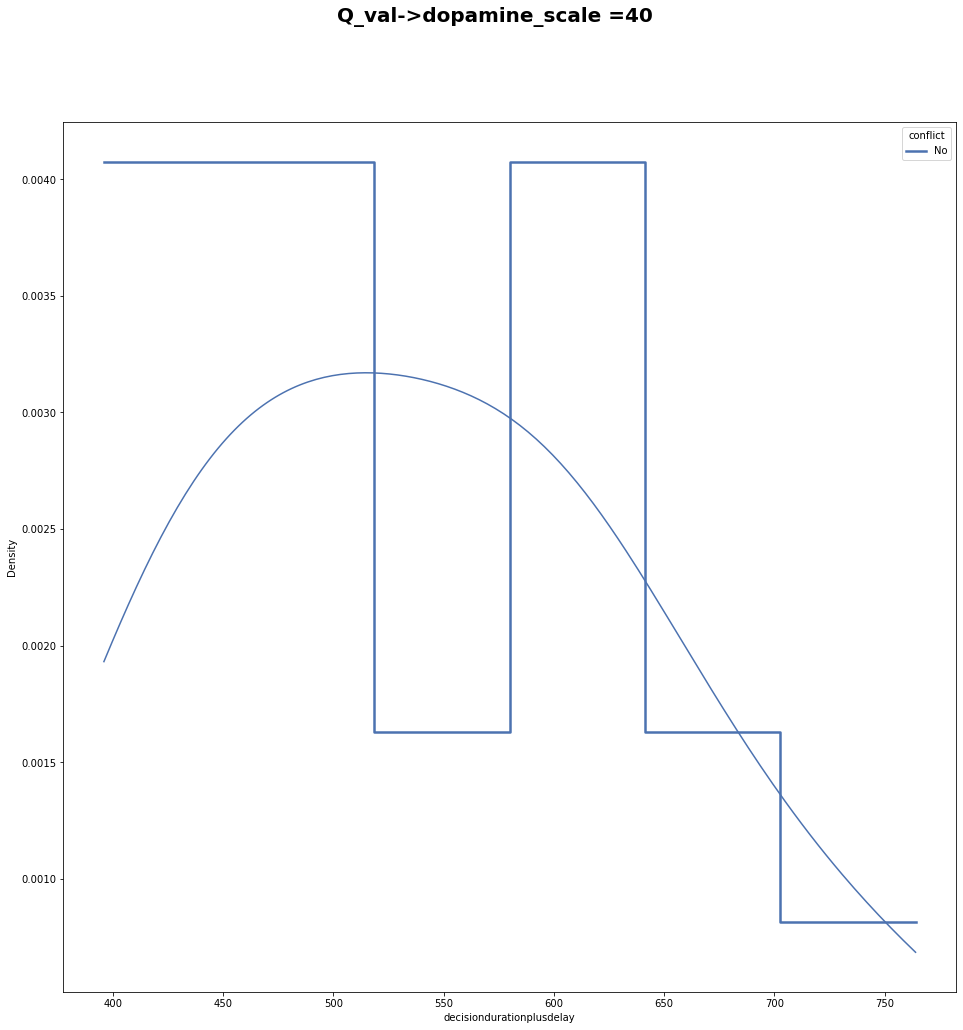

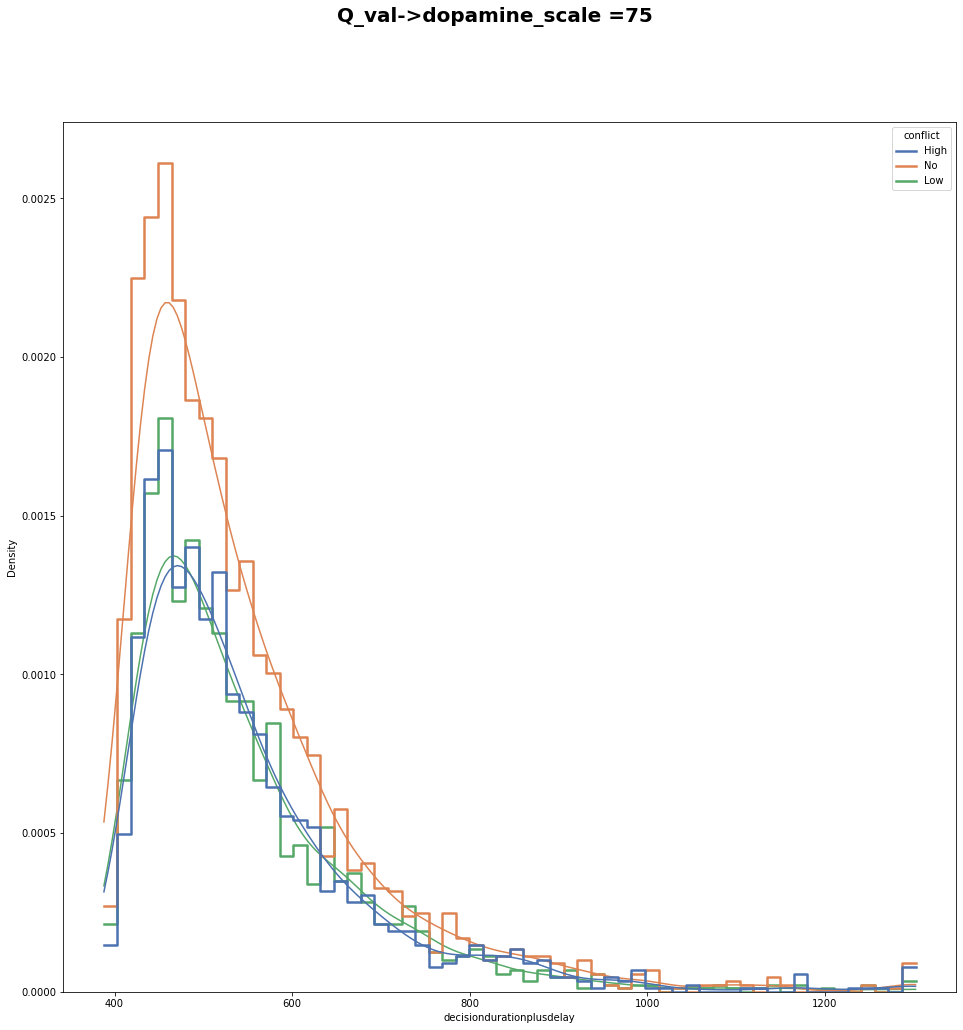

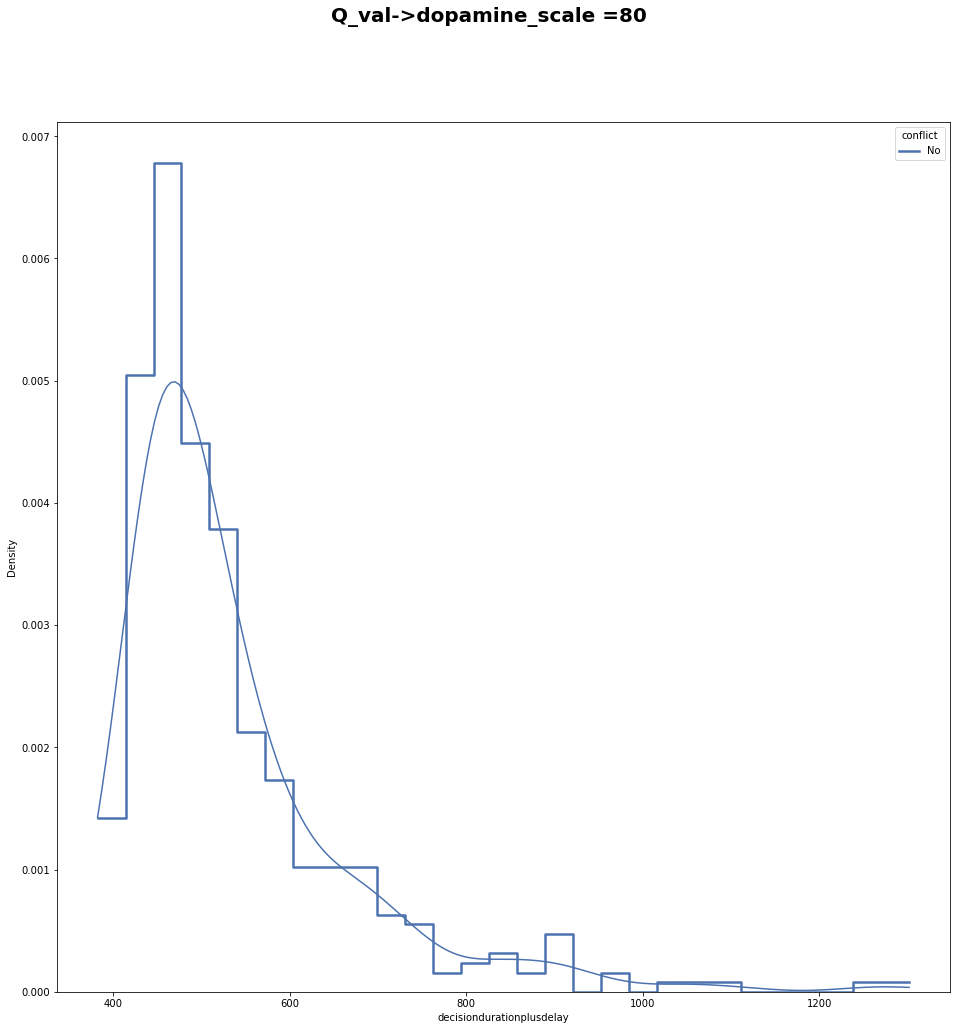

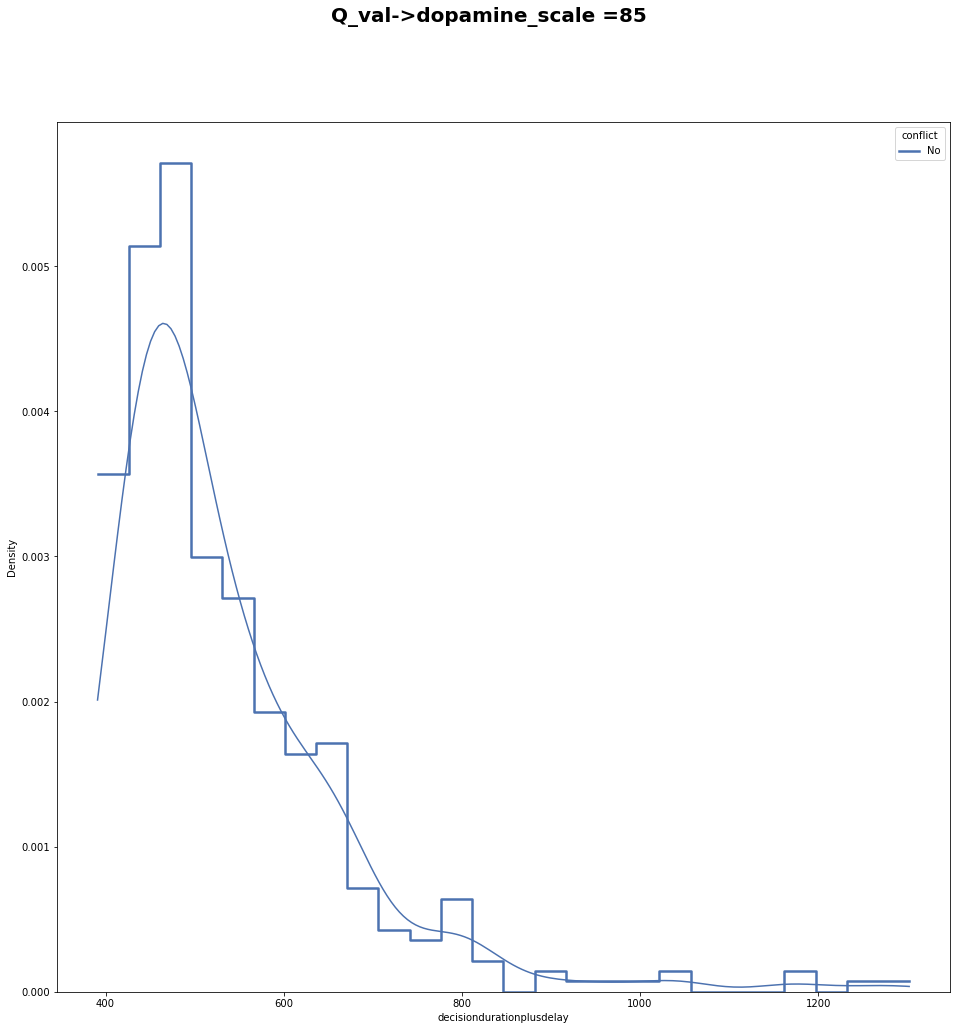

In [45]:








plt_func.performance_all(performance,rt_dist,total_performance)
# To plot performance and rt distributions for all the simulations you have run so far, call performance_all with empty lists
# Pools data over seeds and plots the performance
plt_func.performance_all([],[],[])

    

In [46]:
cbgt.comparisonTable(results, ['n_trials','volatility','conflict'])

n_trials volatility  conflict
0       40         10       1.0
1       40         10       1.0
2       40         10       1.0
3       40         10       1.0
4       40         10       1.0
5       40         10       1.0
6       40         10       1.0
7       40         10       1.0
8       40         10       1.0
9       40         10       1.0

In [ ]:
popfreqs = cbgt.collateVariable(results,'popfreqs')
len(results)

In [ ]:
inp = np.array(results[0]['agent'].inp)

fig,ax = pl.subplots(1,2,figsize=(12,9))
ax[0].plot(inp[:,0],label='Ctx-left-input')
ax[0].plot(inp[:,1],label='Ctx-right-input')
ax[0].legend()
ax[1].plot(popfreqs[i].iloc[:,10],label="Ctx-left-activity",color='r')
ax[1].plot(popfreqs[i].iloc[:,11],label="Ctx-right-activity",color='g')
ax[1].plot(popfreqs[i].iloc[:,15],label="Ctx-inhibition",color='c')
ax[1].legend()
fig.savefig(figure_dir+"Input_vs_activity_lip"+str(seed)+".png")

In [ ]:
popdata = cbgt.collateVariable(results,'popdata')

In [ ]:
popdata[0][popdata[0]['name'] == 'GPi']['column']

In [ ]:
for i in np.arange(len(results)):
    fig,ax = plt.subplots(2,3,figsize=(24,16))
    print(ax)
    stim_on = datatables[i]["stimulusstarttime"]
    decision_time = datatables[i]["decisiontime"]
    weights = np.array(results[i]['agent'].hist_w)
    Wts = pd.DataFrame.from_records(np.array(results[i]['agent'].hist_w).reshape(len(weights),4),columns=nuc_list)
    ax[0][0].plot(popfreqs[i].iloc[:,0],label="GPi-left")
    ax[0][0].plot(popfreqs[i].iloc[:,1],label="GPi-right")

    ax[0][1].plot(popfreqs[i].iloc[:,12],label="Th-left")
    ax[0][1].plot(popfreqs[i].iloc[:,13],label="Th-right")
    
    ax[0][2].plot(popfreqs[i].iloc[:,10],label="Ctx-left")
    ax[0][2].plot(popfreqs[i].iloc[:,11],label="Ctx-right")

    
    ax[1][0].plot(popfreqs[i].iloc[:,6],label="D1-left")
    ax[1][0].plot(popfreqs[i].iloc[:,7],label="D1-right")
    for k in nuc_list:
        ax[1][1].plot(Wts[k],label=k)

    for a in np.hstack(ax):
        ylims = a.get_ylim()
        for s,d in zip(stim_on,decision_time):
            a.vlines(x=s,ymin=ylims[0],ymax=ylims[1],color='k',lw=1.0,ls="solid")
            a.vlines(x=d,ymin=ylims[0],ymax=ylims[1],color='k',lw=1.0,ls="dashed")
            a.set_ylim(ylims[0],ylims[1])
        a.set_xlim(0,3000)
        a.legend()
    fig.subplots_adjust(left=0.06,bottom=0.06,right=0.96,top=0.96)
    fig.savefig(figure_dir+"Zoomed_in_activity_"+str(seed)+"_"+str(i)+".png")

### 2. Modifying default values 

### 2.1 Modifying values 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

### 2.2 Modifying a subset of values

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

### 3. Back to default values 